In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
data=pd.read_csv('historical_data.csv',encoding='unicode_escape')

In [3]:
data.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [4]:
data.shape

(435742, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [6]:
data.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [7]:
data.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [8]:
data.nunique()

stn_code                        803
sampling_date                  5485
state                            37
location                        304
agency                           64
type                             10
so2                            4197
no2                            6864
rspm                           6065
spm                            6668
location_monitoring_station     991
pm2_5                           433
date                           5067
dtype: int64

In [9]:
# all column name present in dataset
data.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

stn_code(station code), sampling_date(date of sample collection,state(india state),location(location of sample),agency type(type of area),so2(sulphur dioxide concentration) no2(nitrogen dioxide concentration),rspm(respriable suspended particulate matter concentration) spm (suspended particulate matter) loction_monitoring_station pm2_5 (particulate matter 2_5) date(date) 


# Data visulaization

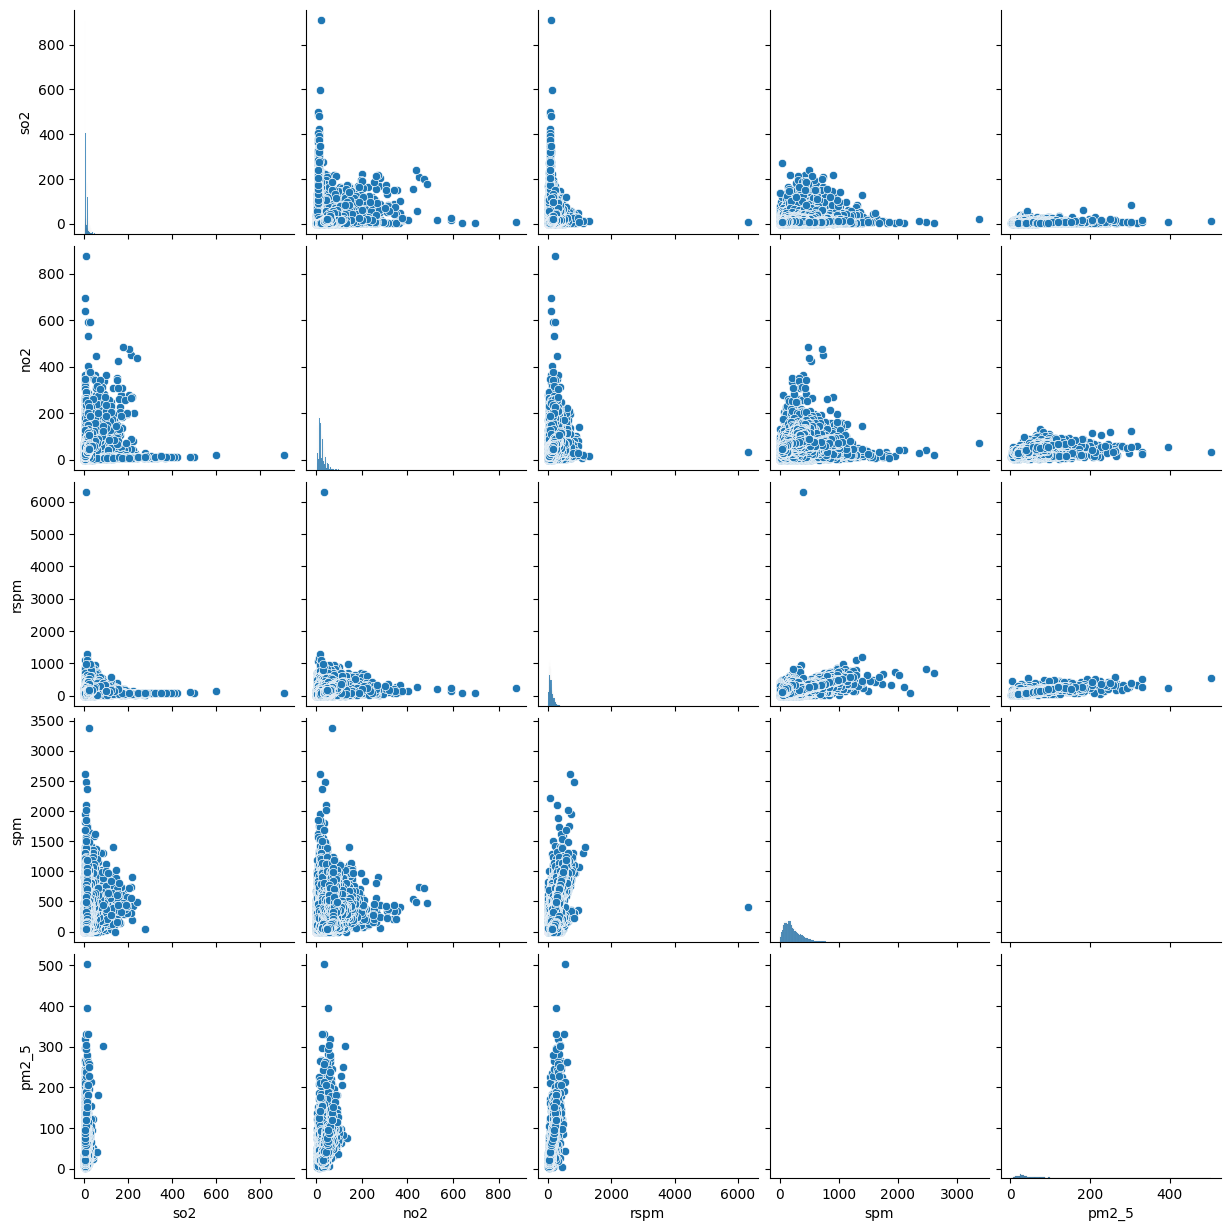

In [10]:
sns.pairplot(data)

In [11]:
data['state'].value_counts()

state
Maharashtra                    60384
Uttar Pradesh                  42816
Andhra Pradesh                 26368
Punjab                         25634
Rajasthan                      25589
Kerala                         24728
Himachal Pradesh               22896
West Bengal                    22463
Gujarat                        21279
Tamil Nadu                     20597
Madhya Pradesh                 19920
Assam                          19361
Odisha                         19279
Karnataka                      17119
Delhi                           8551
Chandigarh                      8520
Chhattisgarh                    7831
Goa                             6206
Jharkhand                       5968
Mizoram                         5338
Telangana                       3978
Meghalaya                       3853
Puducherry                      3785
Haryana                         3420
Nagaland                        2463
Bihar                           2275
Uttarakhand                     

NameError: name 'df' is not defined

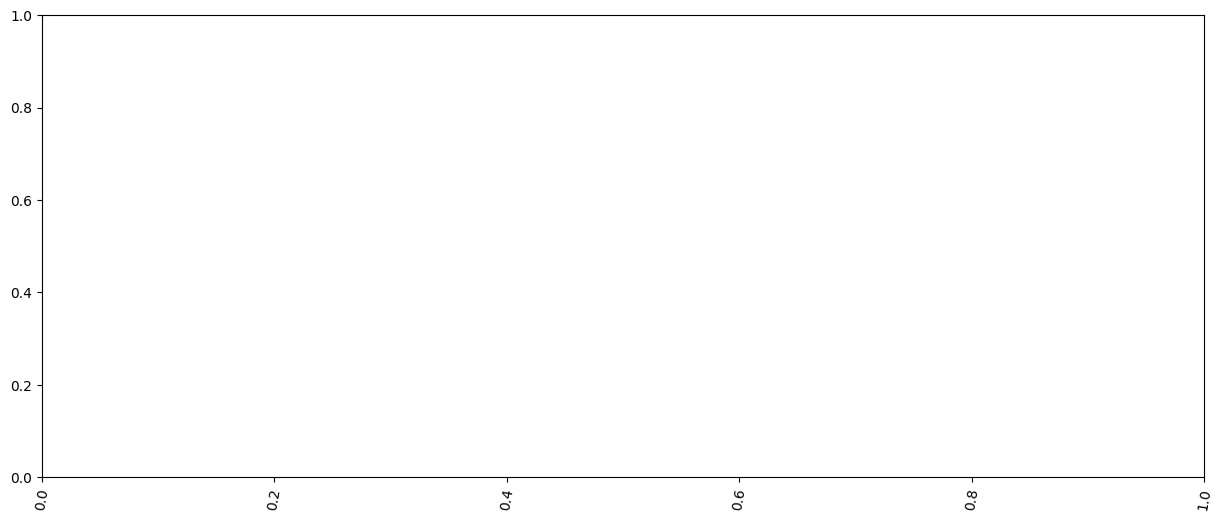

In [12]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=80)
df.state.hist()
plt.xlabel("state")
plt.ylabel("Frequencies")
plt.plot()

In [13]:
df['type'].value_counts()

type
Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: count, dtype: int64

[]

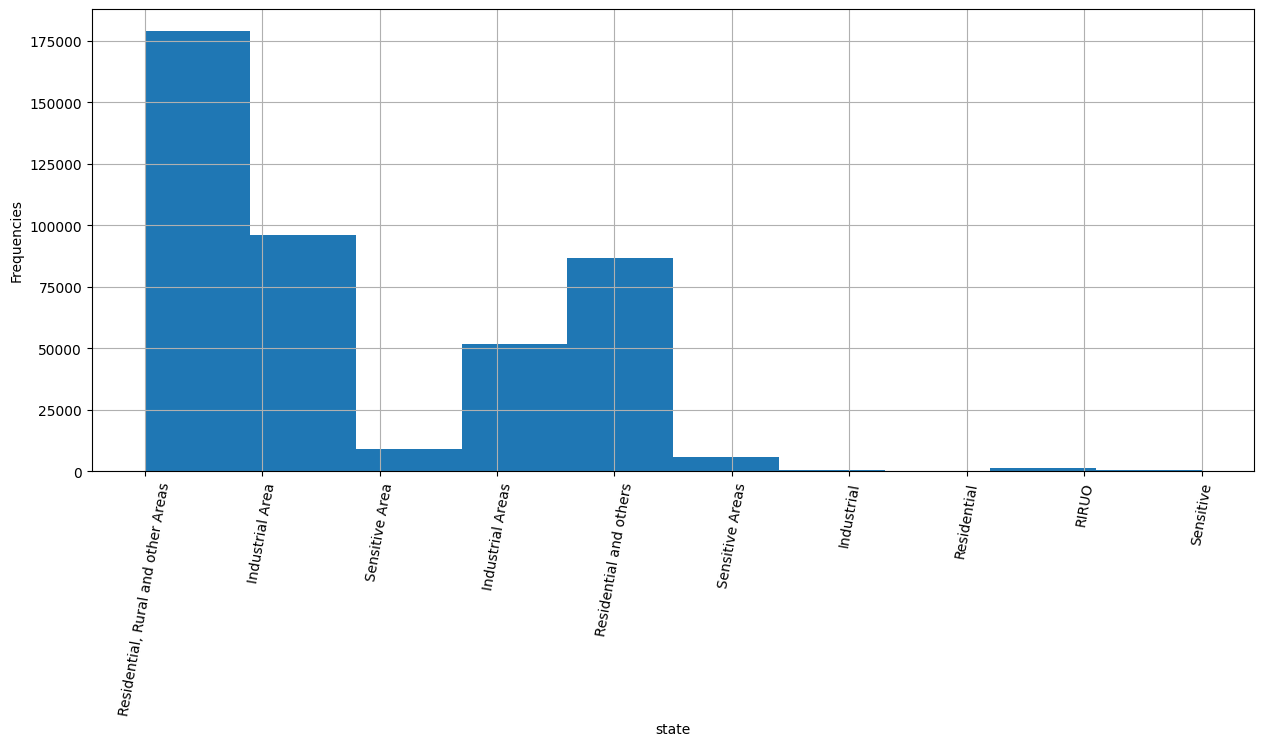

In [14]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=80)
df.type.hist()
plt.xlabel("state")
plt.ylabel("Frequencies")
plt.plot()

In [15]:
df['agency'].value_counts()

agency
Maharashtra State Pollution Control Board                                 27857
Uttar Pradesh State Pollution Control Board                               22686
Andhra Pradesh State Pollution Control Board                              19139
Himachal Pradesh State Environment Proection & Pollution Control Board    15287
Punjab State Pollution Control Board                                      15232
                                                                          ...  
Arunachal Pradesh State Pollution Control Board                              90
TNPC                                                                         82
RPCB                                                                         63
VRCE                                                                         61
RJPB                                                                         53
Name: count, Length: 64, dtype: int64

[]

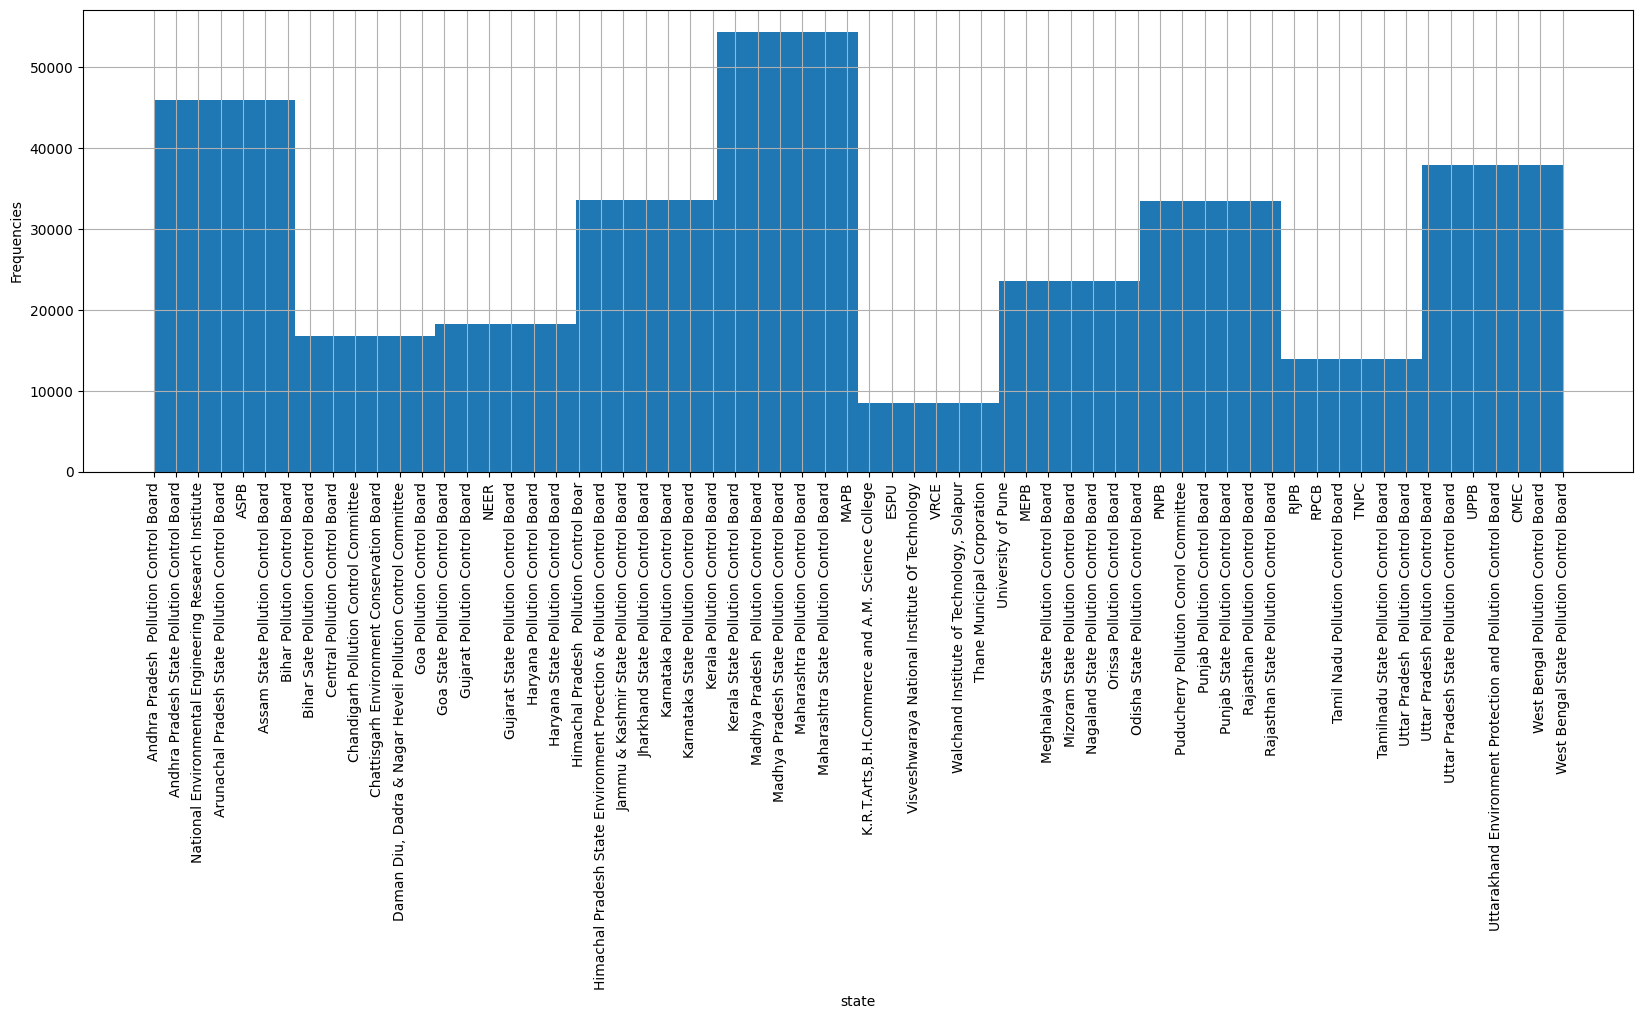

In [16]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
df.agency.hist()
plt.xlabel("state")
plt.ylabel("Frequencies")
plt.plot()

In [17]:
df['so2'].head(20)

0      4.8
1      3.1
2      6.2
3      6.3
4      4.7
5      6.4
6      5.4
7      4.7
8      4.2
9      4.0
10     3.6
11     3.9
12     5.6
13     3.3
14     3.9
15     3.5
16     7.9
17     4.0
18    12.4
19     4.0
Name: so2, dtype: float64

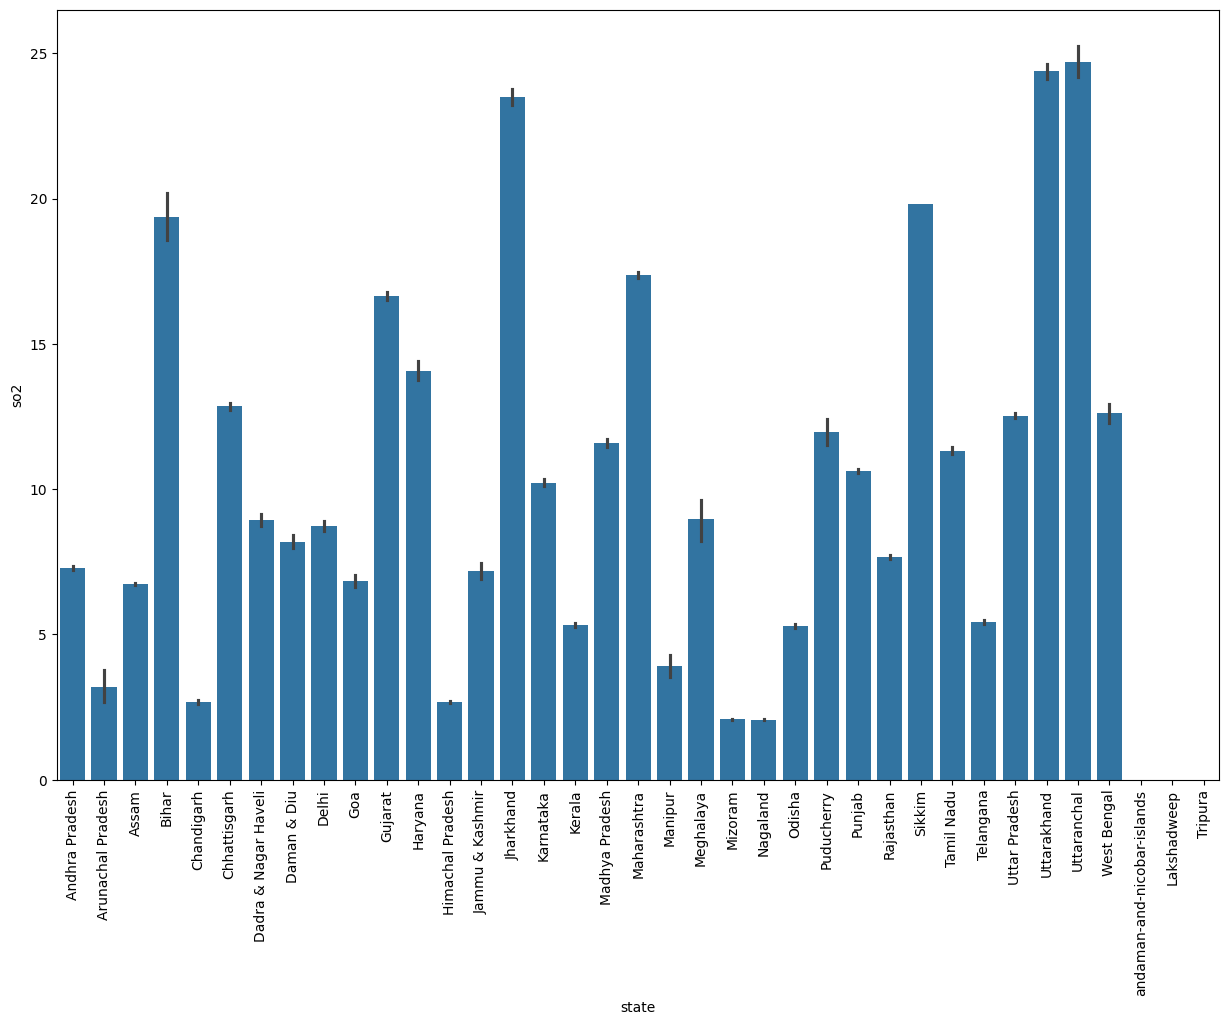

In [18]:
plt.figure(figsize=(15, 10))
sns.barplot(x='state', y='so2', data=df)
plt.xticks(rotation=90)
plt.show()


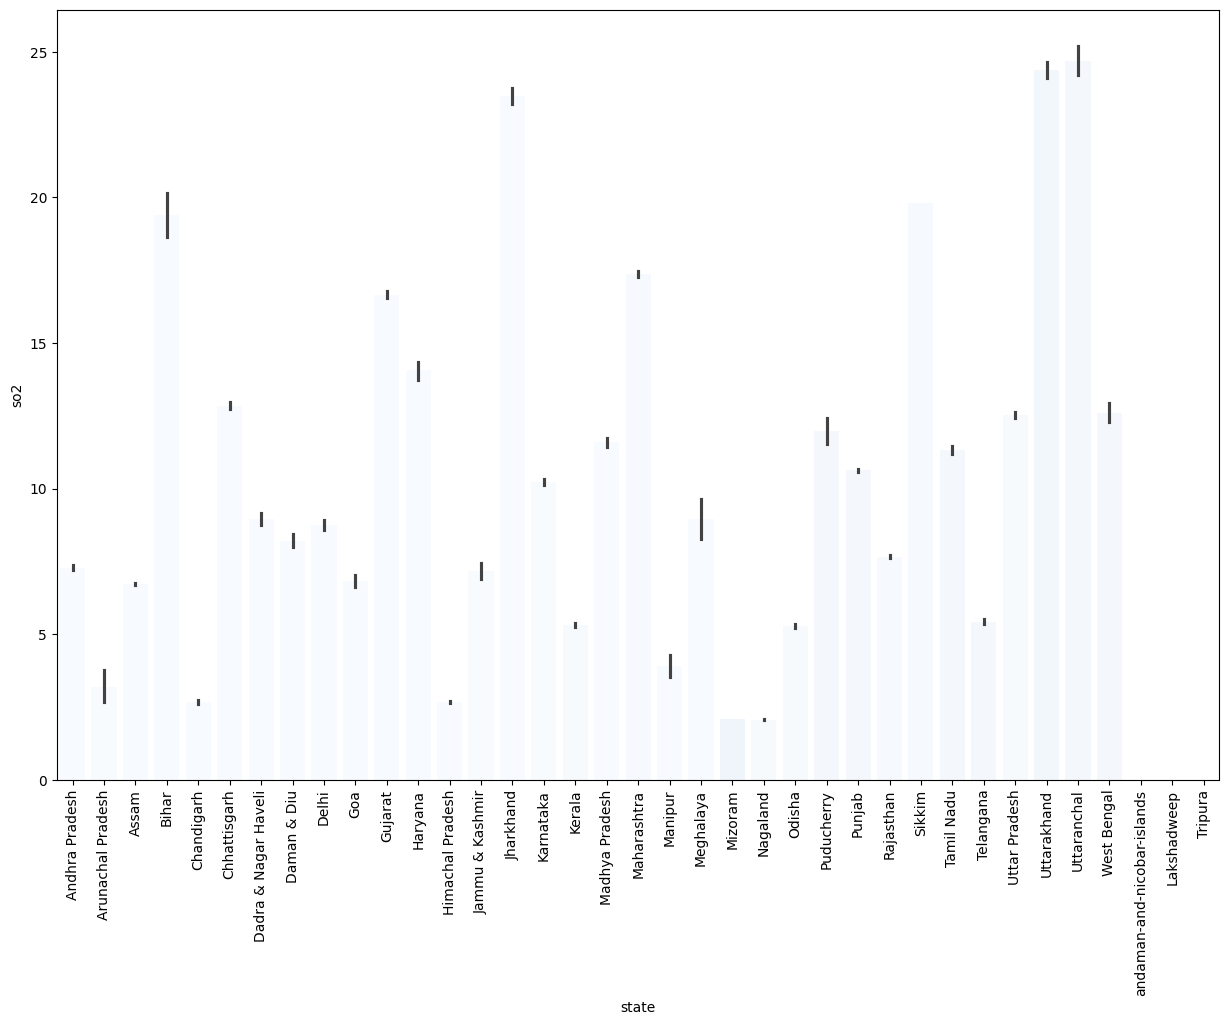

In [19]:
# Create a colormap
cmap = sns.color_palette("Blues", as_cmap=True)
# cmap_reversed = cmap.reversed()

# Normalize the SO2 values
norm = plt.Normalize(df['so2'].min(), df['so2'].max())

# Map the SO2 values to colors
colors = [cmap(norm(value)) for value in df['so2']]

# Create the plot
plt.figure(figsize=(15, 10))
sns.barplot(x='state', y='so2', data=df, palette=colors)
plt.xticks(rotation=90)
plt.show()


<Axes: xlabel='state'>

<Figure size 3000x1000 with 0 Axes>

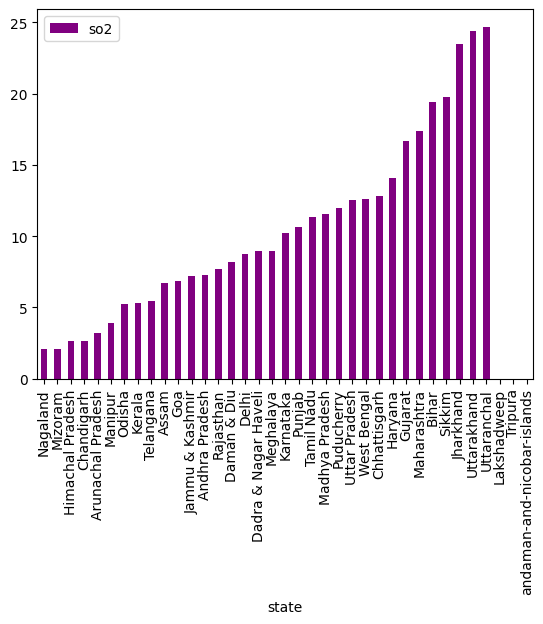

In [20]:
plt.figure(figsize=(30,10))
df[['so2','state']].groupby(['state']).mean().sort_values(by='so2').plot.bar(color='purple')

<Axes: xlabel='state', ylabel='rspm'>

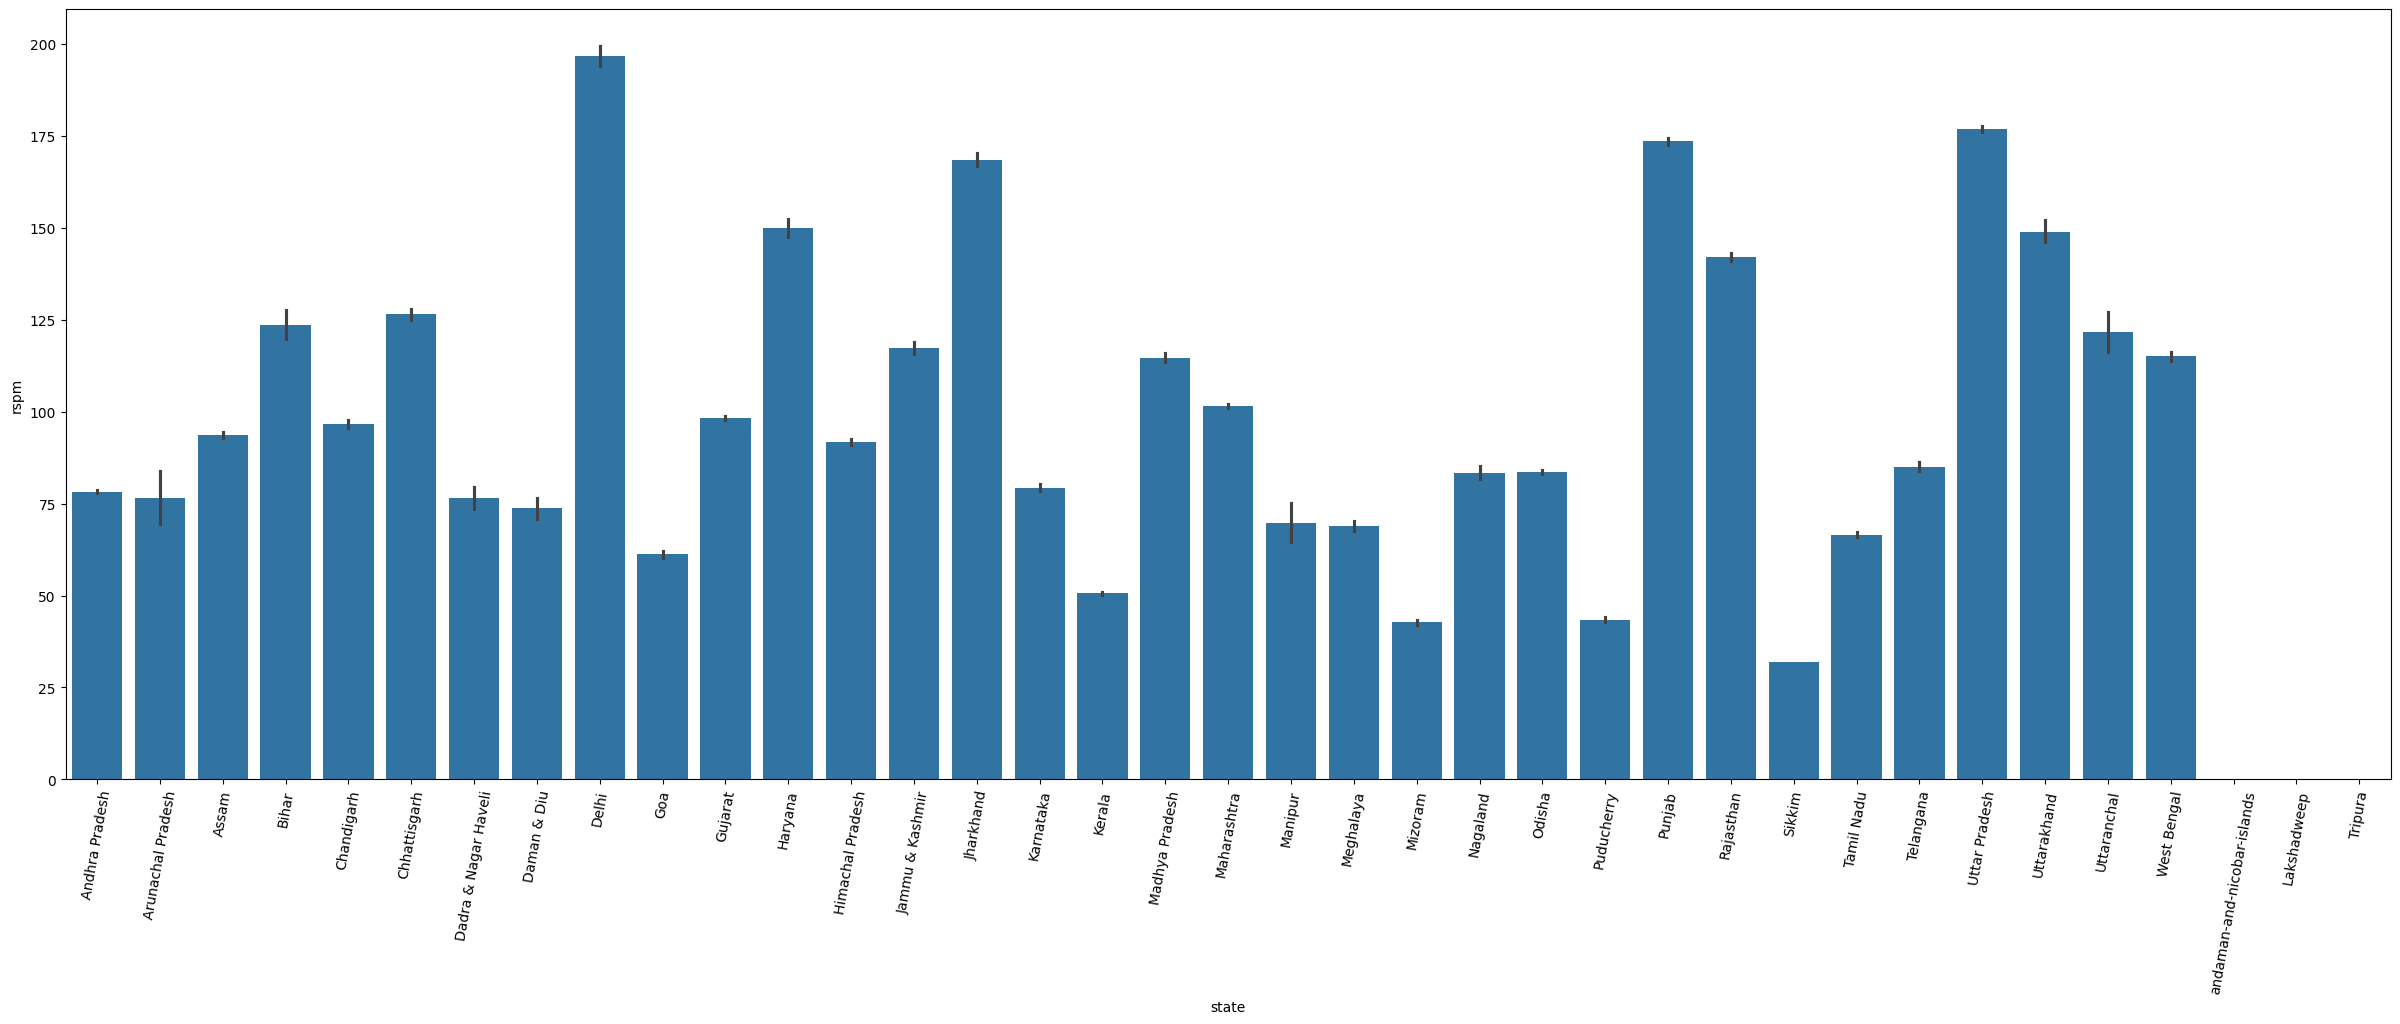

In [21]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=80)
sns.barplot(x='state',y='rspm',data=df)

<Axes: xlabel='state', ylabel='pm2_5'>

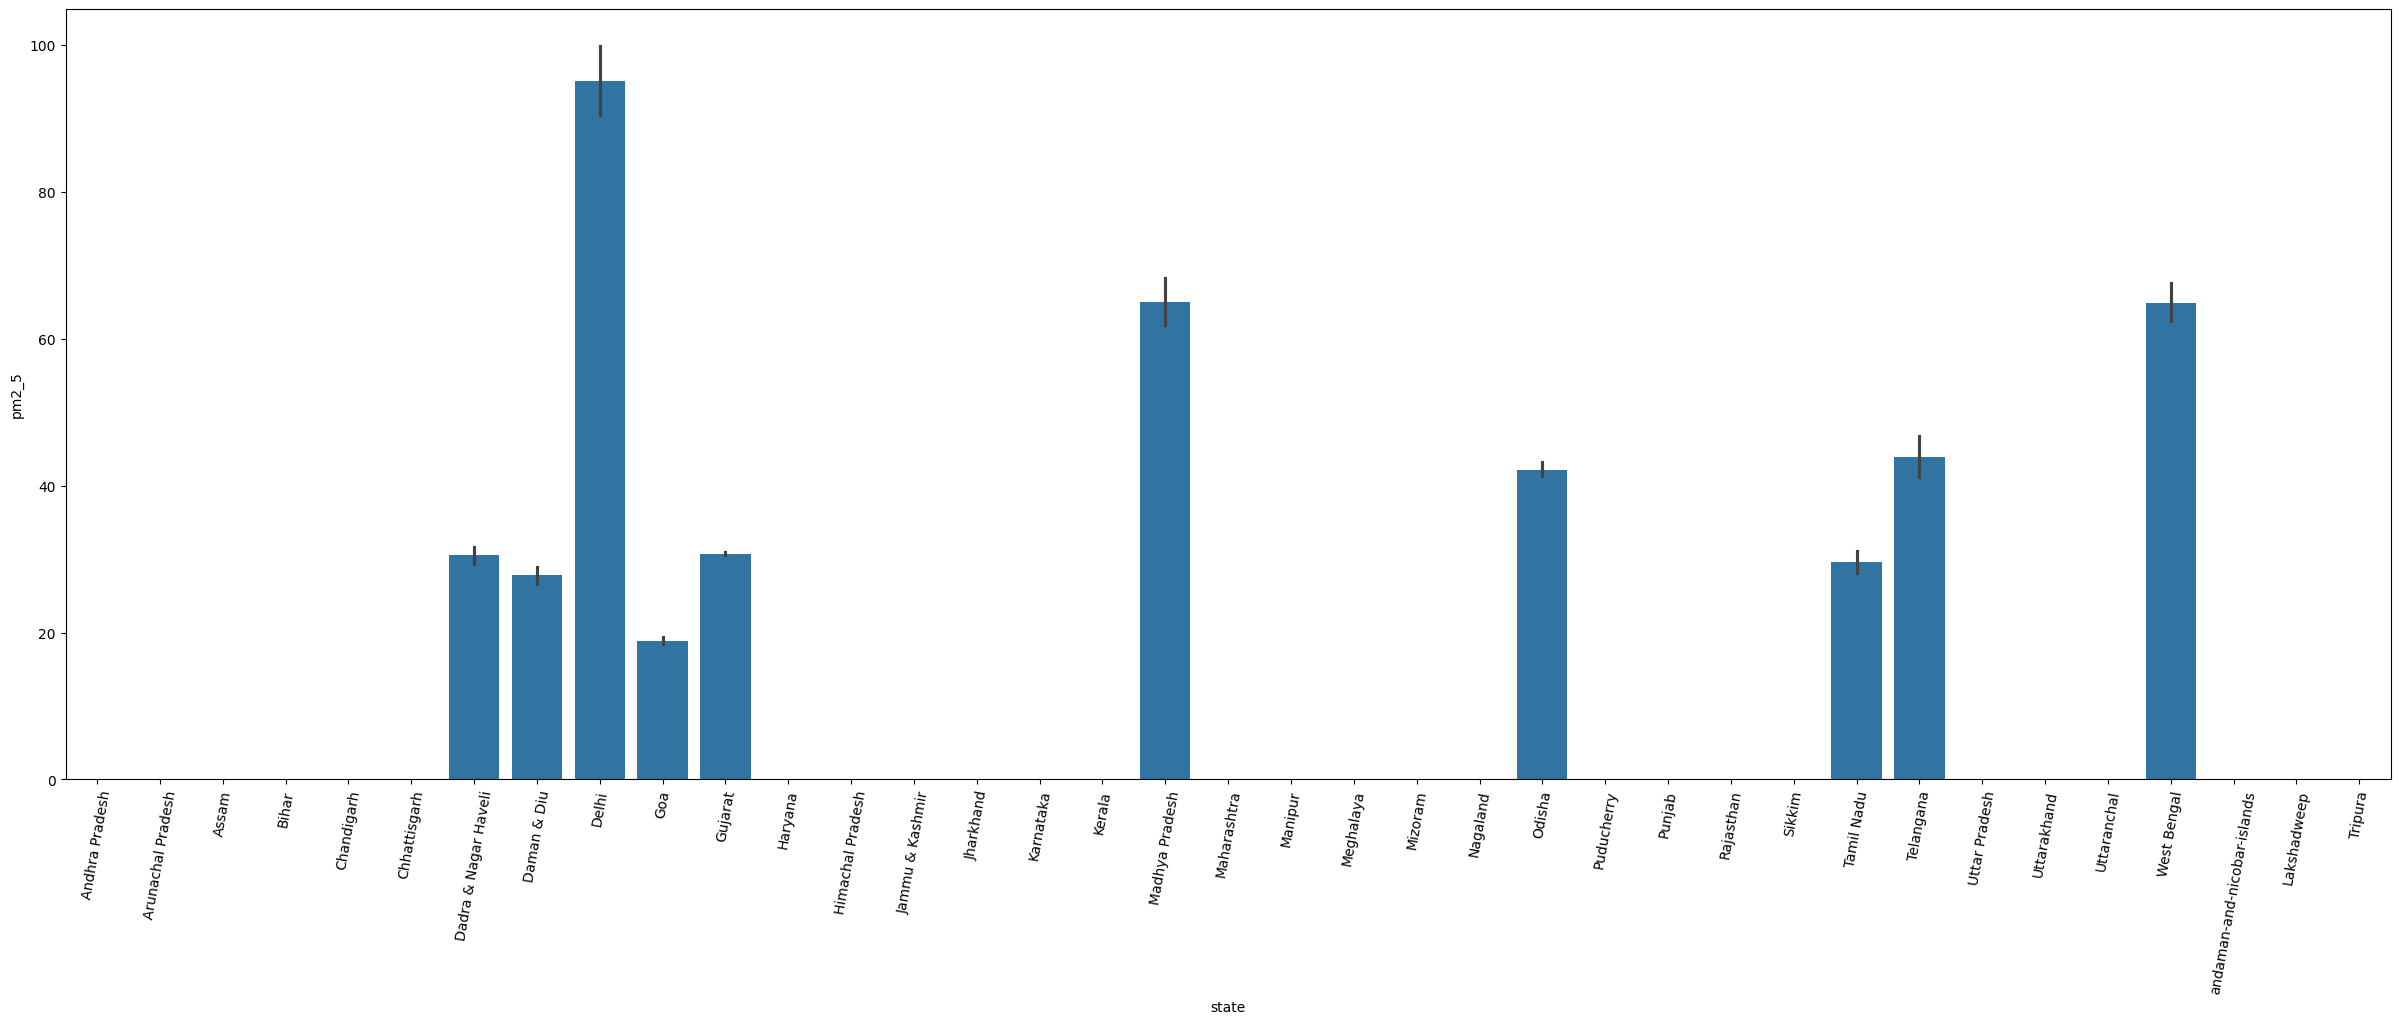

In [22]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=80)
sns.barplot(x='state',y='pm2_5',data=df)

In [12]:
nullvalues=data.isnull().sum().sort_values(ascending=False)

In [13]:
nullvalues

pm2_5                          426428
spm                            237387
agency                         149481
stn_code                       144077
rspm                            40222
so2                             34646
location_monitoring_station     27491
no2                             16233
type                             5393
date                                7
sampling_date                       3
location                            3
state                               0
dtype: int64

In [14]:
nullvalues_parcentage=(data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)

In [15]:
nullvalues_parcentage

pm2_5                          97.862497
spm                            54.478797
agency                         34.304933
stn_code                       33.064749
rspm                            9.230692
so2                             7.951035
location_monitoring_station     6.309009
no2                             3.725370
type                            1.237659
date                            0.001606
sampling_date                   0.000688
location                        0.000688
state                           0.000000
dtype: float64

In [16]:
missing_value_with_parcent=pd.concat([nullvalues,nullvalues_parcentage],axis=1,keys=['total','parcent'])

In [17]:
missing_value_with_parcent

,total,parcent
pm2_5,426428,97.862497
spm,237387,54.478797
agency,149481,34.304933
stn_code,144077,33.064749
rspm,40222,9.230692
so2,34646,7.951035
location_monitoring_station,27491,6.309009
no2,16233,3.725370
type,5393,1.237659
date,7,0.001606


In [18]:
data.drop(['agency'],axis=1,inplace=True)
data.drop(['stn_code'],axis=1,inplace=True)
data.drop(['location_monitoring_station'],axis=1,inplace=True)


In [19]:
data.isnull().sum()

sampling_date         3
state                 0
location              3
type               5393
so2               34646
no2               16233
rspm              40222
spm              237387
pm2_5            426428
date                  7
dtype: int64

In [20]:
data.head()

,sampling_date,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,February - M021990,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,1990-02-01
1,February - M021990,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,February - M021990,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,1990-02-01
3,March - M031990,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,1990-03-01
4,March - M031990,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,1990-03-01


In [21]:
data['location']=data['location'].fillna(data['location'].mode()[0])
data['type']=data['type'].fillna(data['type'].mode()[0])
# null value imputation for categorical data

In [22]:
data.fillna(0,inplace=True)
# null value replaced with zero for the numerical data

In [23]:
data.isnull().sum()

sampling_date    0
state            0
location         0
type             0
so2              0
no2              0
rspm             0
spm              0
pm2_5            0
date             0
dtype: int64

In [24]:
data

,sampling_date,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,February - M021990,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0,1990-02-01
1,February - M021990,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0,1990-02-01
2,February - M021990,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0,1990-02-01
3,March - M031990,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0,1990-03-01
4,March - M031990,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0,1990-03-01
...,...,...,...,...,...,...,...,...,...,...
435737,24-12-15,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,0.0,0.0,2015-12-24
435738,29-12-15,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,0.0,0.0,2015-12-29
435739,0,andaman-and-nicobar-islands,Guwahati,"Residential, Rural and other Areas",0.0,0.0,0.0,0.0,0.0,0
435740,0,Lakshadweep,Guwahati,"Residential, Rural and other Areas",0.0,0.0,0.0,0.0,0.0,0


# calculate air quality index for so2 based on formula

the air quality index is piecewise linear function of the pollition concentration. 
the boundary between AQI cetegories. there is a discontinuous jump of one AQI unit.
To convert from concentration to AQI this eqation is used

## function to calculate SO2 individual pollutant index (si)

In [25]:
#Function to calculate so2 individual pollutant index(si)
def calculate_si(so2):
    si=0
    if (so2<=40):
        si= so2*(50/40)
    if (so2>40 and so2<=80):
        si= 50+(so2-40)*(50/40)
    if (so2>80 and so2<=380):
        si= 100+(so2-80)*(100/300)
    if (so2>380 and so2<=800):
        si= 200+(so2-380)*(100/800)
    if (so2>800 and so2<=1600):
        si= 300+(so2-800)*(100/800)
    if (so2>1600):
        si= 400+(so2-1600)*(100/800)
    return si
data['si']=data['so2'].apply(calculate_si)
df= data[['so2','si']]
df.head()

,so2,si
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


## function to calculate no2 individual pollutant index(ni) 

In [26]:
#Function to calculate no2 individual pollutant index(ni)
def calculate_ni(no2):
    ni=0
    if(no2<=40):
        ni= no2*50/40
    elif(no2>40 and no2<=80):
        ni= 50+(no2-14)*(50/40)
    elif(no2>80 and no2<=180):
        ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
        ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
        ni= 300+(no2-280)*(100/120)
    else:
        ni= 400+(no2-400)*(100/120)
    return ni
data['ni']=data['no2'].apply(calculate_ni)
df= data[['no2','ni']]
df.head()

,no2,ni
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


## function to calculate rspm individual pollutant index(rpi)

In [27]:
#Function to calculate no2 individual pollutant index(rpi)
def calculate_(rspm):
    rpi=0
    if(rpi<=30):
        rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
        rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
        rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
        rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
        rpi=300+(rpi-120)*(100/130)
    else:
        rpi=400+(rpi-250)*(100/130)
    return rpi
data['rpi']=data['rspm'].apply(calculate_si)
df= data[['rspm','rpi']]
df.tail()
#many data values of rspm values is unawailable since it was not measure before

,rspm,rpi
435737,143.0,121.000000
435738,171.0,130.333333
435739,0.0,0.000000
435740,0.0,0.000000
435741,0.0,0.000000


## function to calculate spm individual pollutant index(spi)

In [28]:
#Function to calculate no2 individual pollutant index(spi)
def calculate_spi(spm):
    spi=0
    if(spm<=50):
        spi=spm
    if(spm<50 and spm<=100):
        spi=spm
    elif(spm>100 and spm<=250):
        spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
        spi=200+(spm-250)
    elif(spm>350 and spm<=450):
        spi=300+(spm-350)*(100/80)
    else:
        spi=400+(spm-430)*(100/80)
    return spi
data['spi']=data['spm'].apply(calculate_spi)
df= data[['spm','spi']]
df.tail()
#many data values of spm values is unawailable since it was not measure before

,spm,spi
435737,0.0,0.0
435738,0.0,0.0
435739,0.0,0.0
435740,0.0,0.0
435741,0.0,0.0


## function to calculate Air quality index(AQI) of every data value

In [29]:
#function to calculate the air quality index (AQI) of every data value
#its is calculated as per indian govt standards
def calculate_aqi(si,ni,spi,rpi):
    aqi=0
    if(si>ni and si>spi and si>rpi):
        aqi=si
    if(spi>si and spi>ni and spi>rpi):
        aqi=spi
    if(ni>si and ni>spi and ni>rpi):
        aqi=ni
    if(rpi>si and rpi>ni and rpi>spi):
        aqi=rpi
    return aqi
data['AQI']=data.apply(lambda x:calculate_aqi(x['si'],x['ni'],x['spi'],x['rpi']),axis=1)
df= data[['sampling_date','state','si','ni','rpi','spi','AQI']]
df.head()

,sampling_date,state,si,ni,rpi,spi,AQI
0,February - M021990,Andhra Pradesh,6.000,21.750,0.0,0.0,21.750
1,February - M021990,Andhra Pradesh,3.875,8.750,0.0,0.0,8.750
2,February - M021990,Andhra Pradesh,7.750,35.625,0.0,0.0,35.625
3,March - M031990,Andhra Pradesh,7.875,18.375,0.0,0.0,18.375
4,March - M031990,Andhra Pradesh,5.875,9.375,0.0,0.0,9.375


In [30]:
def AQI_range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "unhealthy"
    elif x>300 and x<=400:
        return "Very Unhealthy"
    elif x>400:
        return "Hazardous"
    
data['AQI_range']=data['AQI'].apply(AQI_range)
data.head()

,sampling_date,state,location,type,so2,no2,rspm,spm,pm2_5,date,si,ni,rpi,spi,AQI,AQI_range
0,February - M021990,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0,1990-02-01,6.000,21.750,0.0,0.0,21.750,Good
1,February - M021990,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0,1990-02-01,3.875,8.750,0.0,0.0,8.750,Good
2,February - M021990,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0,1990-02-01,7.750,35.625,0.0,0.0,35.625,Good
3,March - M031990,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0,1990-03-01,7.875,18.375,0.0,0.0,18.375,Good
4,March - M031990,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0,1990-03-01,5.875,9.375,0.0,0.0,9.375,Good


In [31]:
data['AQI_range'].value_counts()

AQI_range
Poor              224285
Moderate           86450
Good               56947
unhealthy          33510
Hazardous          18701
Very Unhealthy     15849
Name: count, dtype: int64

In [32]:
state=pd.read_csv('poptable.csv')

In [33]:
state.head()

,latitude,longitude,state
0,11.667026,92.735983,Andaman And Nicobar
1,14.750429,78.570026,Andhra Pradesh
2,27.100399,93.616601,Arunachal Pradesh
3,26.749981,94.216667,Assam
4,25.785414,87.479973,Bihar


In [34]:
dff=pd.merge(state.set_index('state'),data.set_index('state'),right_index=True,left_index=True).reset_index()

In [35]:
dff

,state,latitude,longitude,sampling_date,location,type,so2,no2,rspm,spm,pm2_5,date,si,ni,rpi,spi,AQI,AQI_range
0,Andhra Pradesh,14.750429,78.570026,February - M021990,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0,1990-02-01,6.000,21.750,0.000000,0.0,21.750000,Good
1,Andhra Pradesh,14.750429,78.570026,February - M021990,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0,1990-02-01,3.875,8.750,0.000000,0.0,8.750000,Good
2,Andhra Pradesh,14.750429,78.570026,February - M021990,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0,1990-02-01,7.750,35.625,0.000000,0.0,35.625000,Good
3,Andhra Pradesh,14.750429,78.570026,March - M031990,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0,1990-03-01,7.875,18.375,0.000000,0.0,18.375000,Good
4,Andhra Pradesh,14.750429,78.570026,March - M031990,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0,1990-03-01,5.875,9.375,0.000000,0.0,9.375000,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386534,West Bengal,22.580390,88.329947,15-12-15,ULUBERIA,RIRUO,20.0,44.0,148.0,0.0,0.0,2015-12-15,25.000,87.500,122.666667,0.0,122.666667,Poor
386535,West Bengal,22.580390,88.329947,18-12-15,ULUBERIA,RIRUO,17.0,44.0,131.0,0.0,0.0,2015-12-18,21.250,87.500,117.000000,0.0,117.000000,Poor
386536,West Bengal,22.580390,88.329947,21-12-15,ULUBERIA,RIRUO,18.0,45.0,140.0,0.0,0.0,2015-12-21,22.500,88.750,120.000000,0.0,120.000000,Poor
386537,West Bengal,22.580390,88.329947,24-12-15,ULUBERIA,RIRUO,22.0,50.0,143.0,0.0,0.0,2015-12-24,27.500,95.000,121.000000,0.0,121.000000,Poor


In [36]:
#setting up date parameter
import warnings
import itertools
import dateutil
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline
df=data[['AQI','date']]
df["date"] = pd.to_datetime(df['date'],errors='coerce')
df.tail(20)

,AQI,date
435722,118.333333,2015-11-05
435723,118.666667,2015-11-07
435724,140.666667,2015-11-10
435725,133.666667,2015-11-11
435726,105.000000,2015-11-16
435727,112.666667,2015-11-20
435728,121.333333,2015-11-26
435729,120.000000,2015-11-29
435730,120.666667,2015-12-03
435731,125.000000,2015-12-06


In [105]:
output_file="C:\\Users\\DELL\\OneDrive\\Air_Quality_Index(AQI)\\forcasting_file.csv"
df.to_csv(output_file,index=False)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   AQI     435742 non-null  float64       
 1   date    435735 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.6 MB


In [37]:
#Calculating the yearly mean for the data 
df=df.set_index('date').resample('M')["AQI"].mean()
df.head()

date
1987-01-31    242.438652
1987-02-28    235.787929
1987-03-31    294.558772
1987-04-30    202.012681
1987-05-31    307.991667
Name: AQI, dtype: float64

In [38]:
#preprocessing the data values
data=df.reset_index(level=0, inplace=False)
data = data[np.isfinite(data['AQI'])]
data=data[data.date != '1970-01-31']
data = data.reset_index(drop=True)
data.head()

,date,AQI
0,1987-01-31,242.438652
1,1987-02-28,235.787929
2,1987-03-31,294.558772
3,1987-04-30,202.012681
4,1987-05-31,307.991667


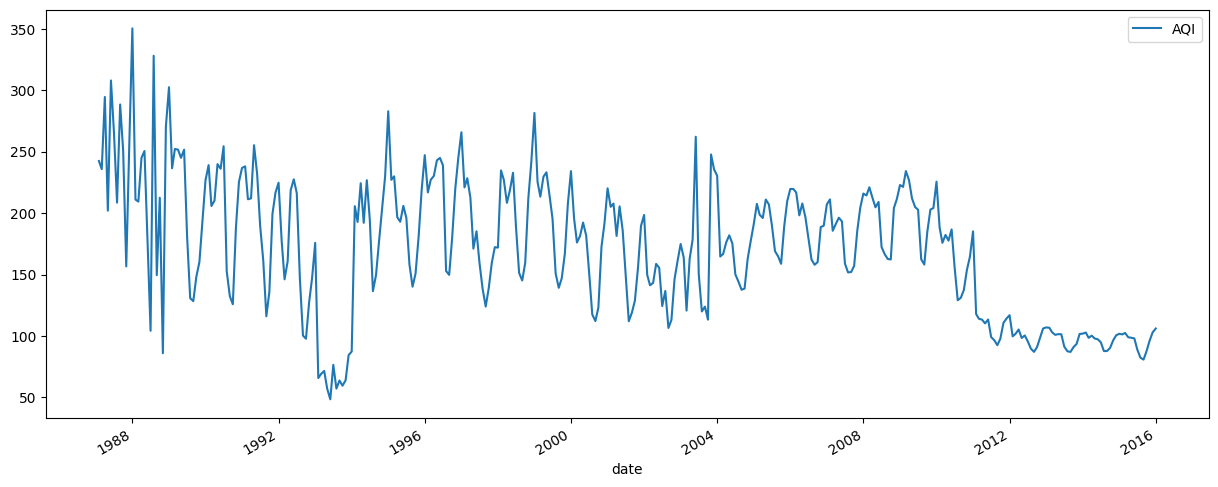

In [39]:
#visualizing the processed data of AQI

df=data.set_index('date')
df.sort_values(by='date',ascending=False)
df.plot(figsize=(15, 6))
plt.show()
y=df.AQI


In [40]:
#exctracting knowledge about data

#spliting dataframes into test and train
n = df.shape[0]
train_size = 0.65

features_dataframe = df.sort_values('date')
train = df.iloc[:int(n * train_size)]
test = df.iloc[int(n * train_size):]

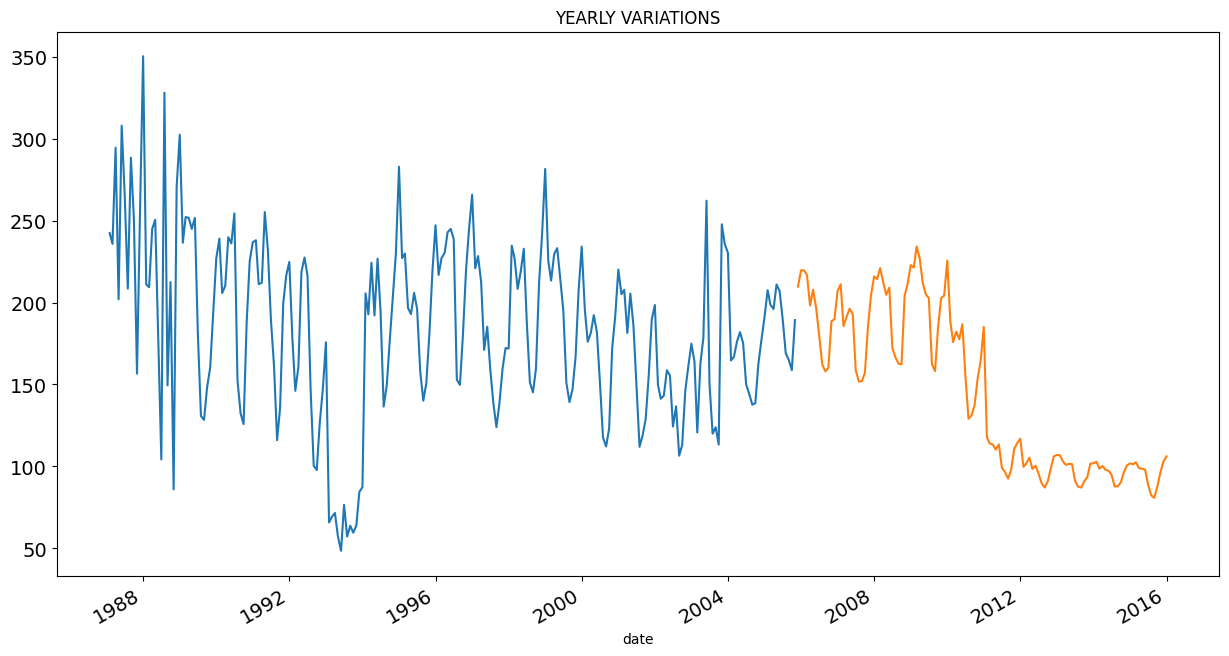

In [41]:
#plotting the yearly variations of AQI

train.AQI.plot(figsize=(15,8), title= 'YEARLY VARIATIONS', fontsize=14)
test.AQI.plot(figsize=(15,8), title= 'YEARLY VARIATIONS', fontsize=14)
plt.show()

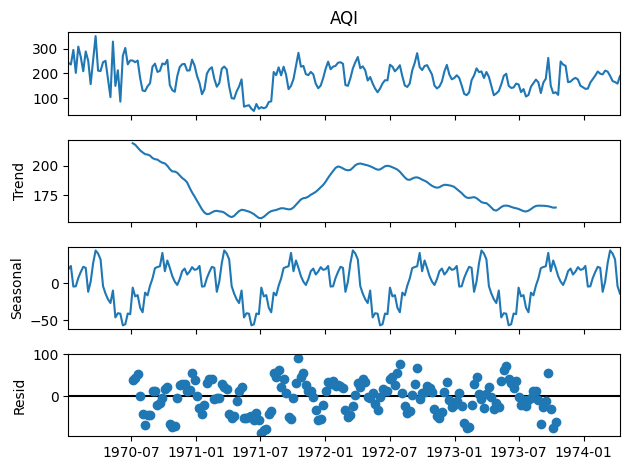

In [42]:
#various statmodel to identity huge variations od data values
import statsmodels.api as sm
train.index=pd.date_range(freq="w", start=0 ,periods=224)

sm.tsa.seasonal_decompose(train.AQI).plot()
result = sm.tsa.stattools.adfuller(train.AQI)
plt.show()

In [43]:
#resampling the data to predict monthly AQI of india

df=data[['AQI','date']]

df['date']=pd.to_datetime(df['date'])
date=df.groupby(pd.Grouper(key='date',freq='1MS'))["AQI"].mean()
df.count()

AQI     346
date    346
dtype: int64

In [44]:
#splitting the sampling date into month and year accordingly
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data=data[['AQI','date','month','year']]
data.head()

,AQI,date,month,year
0,242.438652,1987-01-31,1,1987
1,235.787929,1987-02-28,2,1987
2,294.558772,1987-03-31,3,1987
3,202.012681,1987-04-30,4,1987
4,307.991667,1987-05-31,5,1987


In [45]:
#predicting JANUARY-AQI across india
data=data[data['month']==1]
data.head()

,AQI,date,month,year
0,242.438652,1987-01-31,1,1987
12,211.076502,1988-01-31,1,1988
24,236.513310,1989-01-31,1,1989
35,239.071032,1990-01-31,1,1990
47,238.060052,1991-01-31,1,1991


In [46]:
#Appling BOXPLOT analysis
df = data[['AQI','year']].groupby(["year"]).mean().reset_index().sort_values(by='year',ascending=False)
df=df.dropna()
dd=df
df.describe()

,year,AQI
count,29.000000,29.000000
mean,2001.000000,186.582077
std,8.514693,51.439662
min,1987.000000,65.754613
25%,1994.000000,163.875510
50%,2001.000000,207.546049
75%,2008.000000,221.368166
max,2015.000000,242.438652


<Axes: xlabel='AQI'>

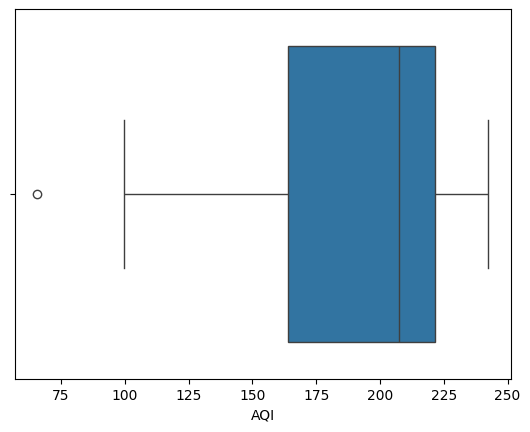

In [47]:
import seaborn as sns
sns.boxplot(x=df['AQI'])

In [48]:
#removing outliers
df = df[np.isfinite(df['AQI'])]
df=df[df.AQI >153]
df=df[df.AQI <221]
df

,year,AQI
23,2010,188.283360
21,2008,214.378174
20,2007,211.160807
19,2006,219.623267
18,2005,207.546049
17,2004,164.661496
16,2003,163.875510
14,2001,205.138247
13,2000,195.772377
10,1997,220.903571


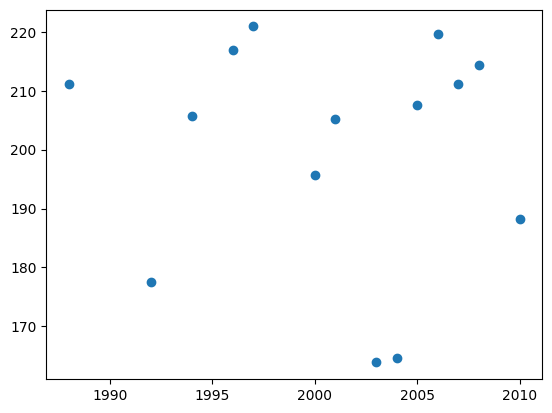

In [49]:
#scatter plot of data points
cols =['year']
y = df['AQI']
x=df[cols]

plt.scatter(x,y)
plt.show()

In [50]:

x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]
x

array([[ 1.        ,  1.40346276],
       [ 1.        ,  1.09883519],
       [ 1.        ,  0.9465214 ],
       [ 1.        ,  0.79420761],
       [ 1.        ,  0.64189382],
       [ 1.        ,  0.48958003],
       [ 1.        ,  0.33726625],
       [ 1.        ,  0.03263867],
       [ 1.        , -0.11967512],
       [ 1.        , -0.57661648],
       [ 1.        , -0.72893027],
       [ 1.        , -1.03355785],
       [ 1.        , -1.33818543],
       [ 1.        , -1.94744058]])

## toolkit is used for plotting 2D data on map

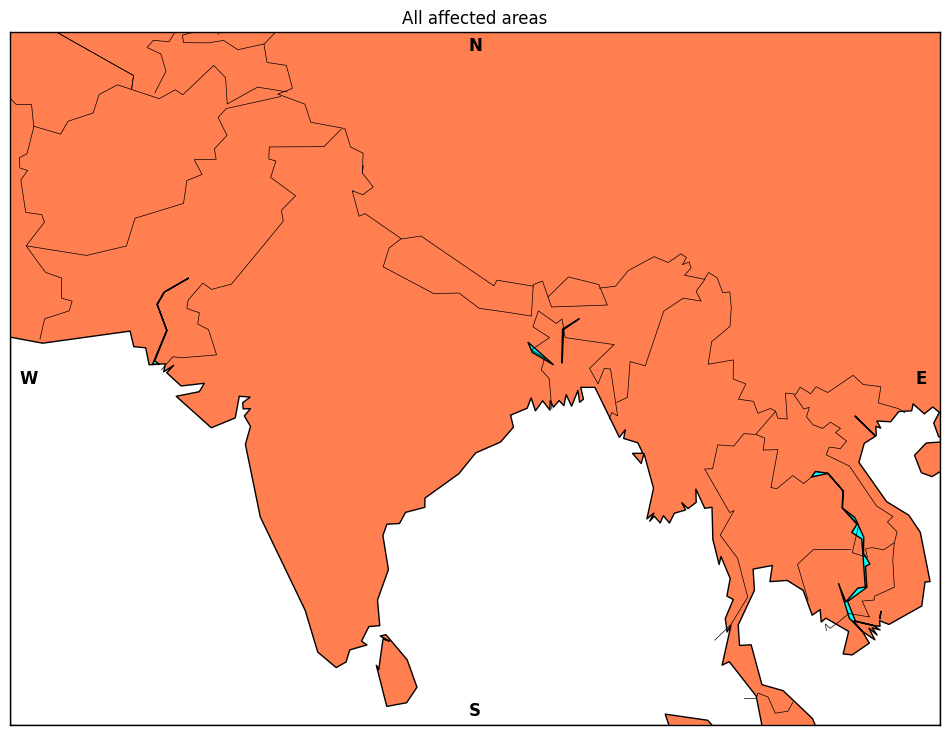

In [40]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Initialize the Basemap
m = Basemap(projection='mill', llcrnrlat=5, urcrnrlat=40, llcrnrlon=60, urcrnrlon=110, lat_ts=20, resolution='c')

# Convert latitude and longitude to map projection coordinates
longitudes = dff["latitude"].tolist()
latitudes = dff["longitude"].tolist()
x, y = m(longitudes, latitudes)

# Create the plot
fig = plt.figure(figsize=(12, 10))
plt.title("All affected areas")

# Plot the data points
m.plot(x, y, "o", markersize=3, color='blue')

# Draw coastlines, continents, and boundaries
m.drawcoastlines()
m.fillcontinents(color='coral', lake_color='aqua')
m.drawmapboundary()
m.drawcountries()

# Get the map corners in map projection coordinates
map_width = m.xmax - m.xmin
map_height = m.ymax - m.ymin

# Define positions for the compass directions relative to the map boundaries
compass_positions = {
    'N': (m.xmin + map_width / 2, m.ymax * 0.98),
    'S': (m.xmin + map_width / 2, m.ymin + map_height * 0.02),
    'E': (m.xmax * 0.98, m.ymin + map_height / 2),
    'W': (m.xmin + map_width * 0.02, m.ymin + map_height / 2),
}

# Add text annotations for the compass directions
for direction, position in compass_positions.items():
    plt.text(position[0], position[1], direction, ha='center', va='center', fontsize=12, fontweight='bold')

# Show the plot
plt.show()


In [54]:
pip install basemap

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/56.0 kB ? eta -:--:--
     --------------------- ------------------ 30.7/56.0 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 56.0/56.0 kB 578.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/507.3 kB ? eta -:--:--
   ---- ----------------------------------- 61.4/507.3 kB 1.7 MB/s eta 0:00:01
   -------- ------------------------------- 112.6/507.3 kB 1.3 MB/s eta 0:00:01
   ----------- ---------------------------- 143.4/507.3 kB 1.1 MB/s eta 0:00:01
   ----------------- ---------------------- 225.3/507.3 kB 1.4 MB/s eta 0:00:01
   ---------------------- ----------------- 286.7/507.3 kB 1.5 MB/s eta 0:00:01
   ---------------------------------- ----- 440.3/507.3 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 507.3/507.3 kB 1.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/30.5 MB ? et


[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
pip install basemap

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [61]:
pip install pyproj

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [62]:
pip install basemap-data-hires

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/91.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/91.1 MB 660.6 kB/s eta 0:02:18
   ---------------------------------------- 0.1/91.1 MB 762.6 kB/s eta 0:02:00
   ---------------------------------------- 0.1/91.1 MB 744.7 kB/s eta 0:02:03
   ---------------------------------------- 0.2/91.1 MB 817.0 kB/s eta 0:01:52
   ---------------------------------------- 0.2/91.1 MB 827.9 kB/s eta 0:01:50
   ---------------------------------------- 0.3/91.1 MB 1.0 MB/s eta 0:01:31
   ---------------------------------------- 0.3/91.1 MB 999.0 kB/s eta 0:01:31
   ---------------------------------------- 0.4/91.1 MB 1.1 MB/s eta 0:01:20
   ---------------------------------------- 0.5/91.1 MB 1.1 MB/s eta 0:01:20
   ---------------------------------------- 0.5/91.1 MB 1.1 MB/s eta 0:01:22
   --


[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [66]:
conda install -c conda-forge basemap

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.



CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://conda.anaconda.org/conda-forge/win-64/current_repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.
'https//conda.anaconda.org/conda-forge/win-64'




In [67]:
conda install -c conda-forge basemap-data-hires



Note: you may need to restart the kernel to use updated packages.Collecting package metadata (current_repodata.json): ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\anaconda3

  added / updated specs:
    - basemap-data-hires


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    basemap-data-1.3.2         |     pyhd8ed1ab_3        24.1 MB  conda-forge
    basemap-data-hires-1.3.2   |     pyhd8ed1ab_3        80.7 MB  conda-forge
    ca-certificates-2024.7.4   |       h56e8100_0         151 KB  conda-forge
    certifi-2024.7.4           |     pyhd8ed1ab_0         156 KB  conda-forge
    ------------------------------------------------------------
                                           Total:       105.1 MB

The following NEW packages will be INSTALLED:

  basemap-data       conda-forge/noarch::basemap-data-1.3.2-pyhd8



==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.7.1

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.7.1



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\anaconda3




In [48]:
data_01.head()

,state,soi,noi,rpi,spi,AQI
0,Andhra Pradesh,6.000,21.750,0.0,0.0,21.750
1,Andhra Pradesh,3.875,8.750,0.0,0.0,8.750
2,Andhra Pradesh,7.750,35.625,0.0,0.0,35.625
3,Andhra Pradesh,7.875,18.375,0.0,0.0,18.375
4,Andhra Pradesh,5.875,9.375,0.0,0.0,9.375


This bar plot provides a comprehensive overview of air quality across various states in India, highlighting areas with significant pollution issues and areas with relatively better air quality. It allows for quick visual comparison and helps identify regions that may need more focused environmental policies and interventions to improve air quality.

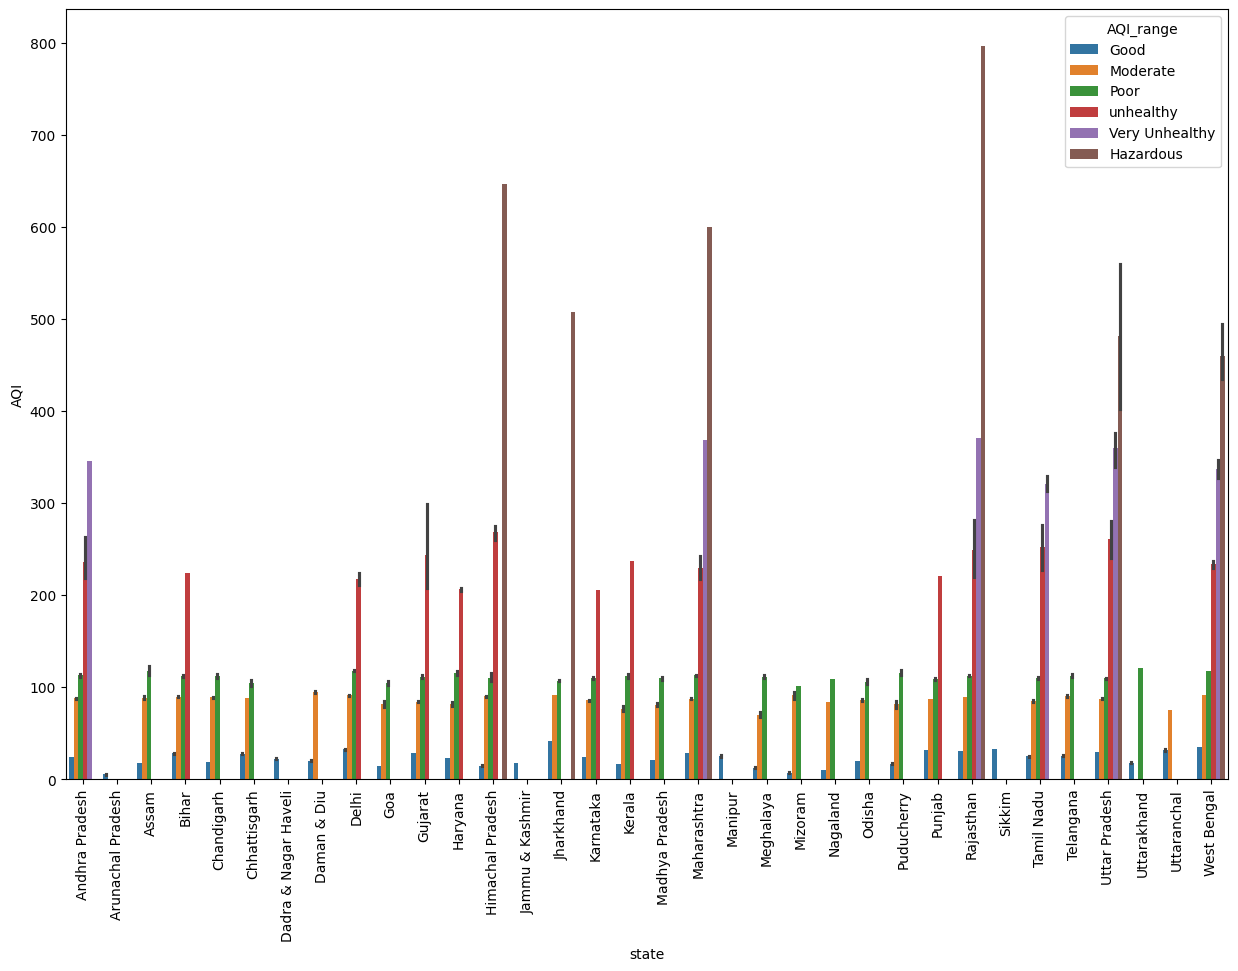

In [49]:
f,ax=plt.subplots(figsize=(15,10))
sns.barplot(x='state',y='AQI',hue='AQI_range',data=data)
plt.xticks(rotation=90)
plt.show()

Variability in AQI:

States like Delhi, Uttar Pradesh, and West Bengal show a wide range of AQI values, with many outliers indicating episodes of very high pollution.
States like Arunachal Pradesh and Nagaland show a narrower range, suggesting more consistent air quality.
Median AQI:

The median line inside each box gives a quick sense of the typical AQI value for each state.
For example, Delhi has a higher median AQI compared to other states, indicating generally poorer air quality.
Interquartile Range (IQR):

The size of the boxes can give an indication of the variability within each state. Larger boxes indicate more variability in AQI measurements.
States like Punjab and Haryana show moderate variability, whereas states like Andhra Pradesh and Kerala show less variability in their AQI values.
Outliers:

Numerous outliers in states like Uttar Pradesh and West Bengal suggest that there are frequent instances of unusually high pollution levels.
States with fewer outliers (e.g., Arunachal Pradesh, Goa) suggest more stable air quality.

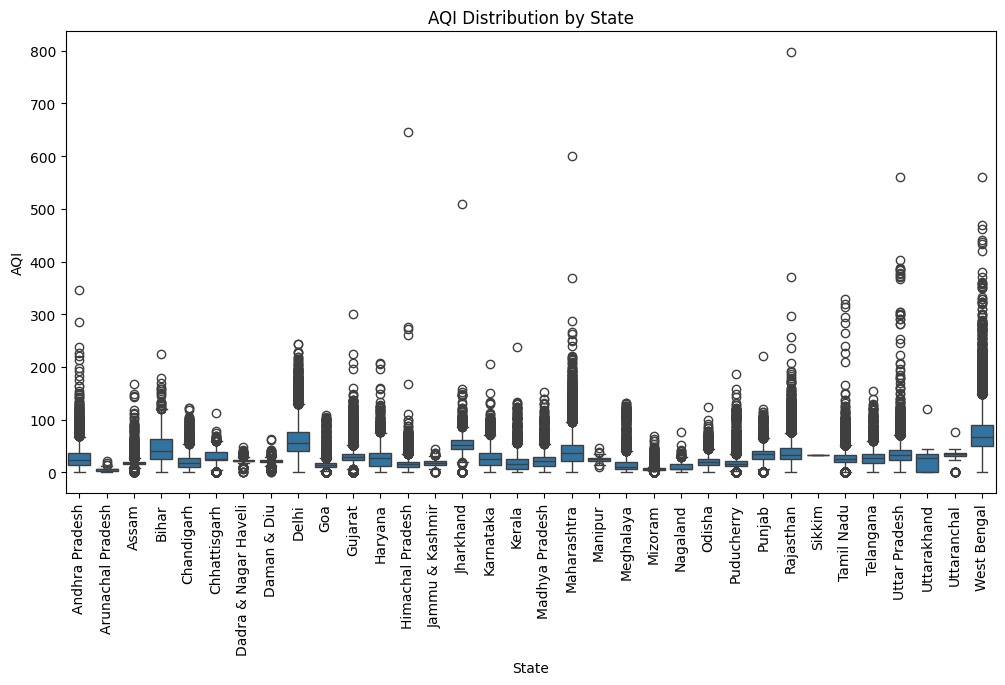

In [161]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='state', y='AQI', data=data)
plt.title('AQI Distribution by State')
plt.xlabel('State')
plt.ylabel('AQI')
plt.xticks(rotation=90)  # Rotate state names for better visibility
plt.show()

A heatmap can show the correlation between different pollutants and AQI. This helps in understanding how different pollutants contribute to the overall air quality.

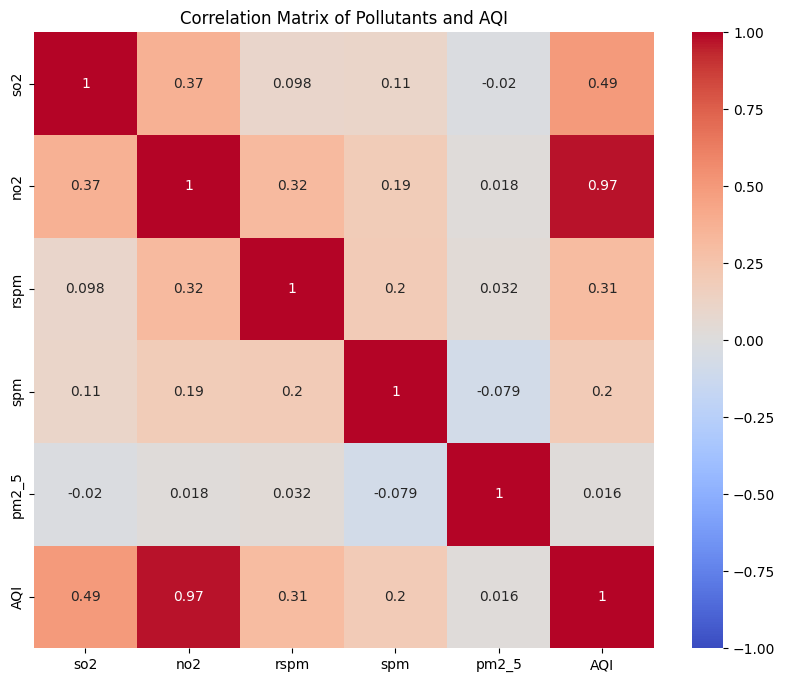

In [162]:
plt.figure(figsize=(10, 8))
correlation_matrix = data[['so2', 'no2', 'rspm', 'spm', 'pm2_5', 'AQI']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Pollutants and AQI')
plt.show()


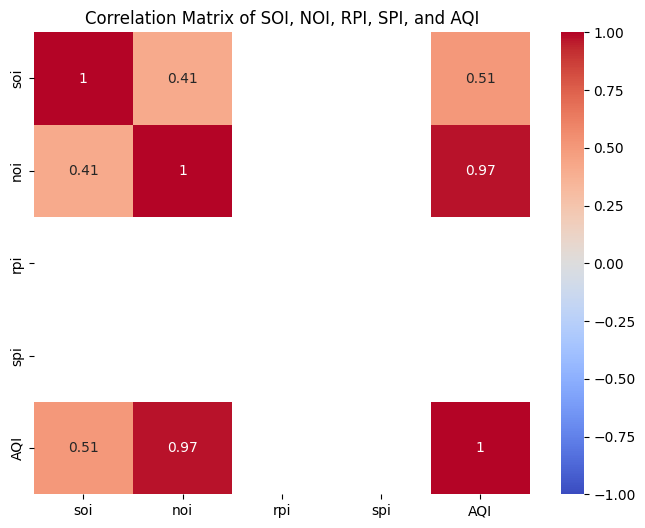

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = data[['soi', 'noi', 'rpi', 'spi', 'AQI']].corr()
# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of SOI, NOI, RPI, SPI, and AQI')
plt.show()


Violin Plot: AQI Distribution by Location Type
A violin plot combines aspects of box plots and density plots to show the distribution of AQI values across different location types.

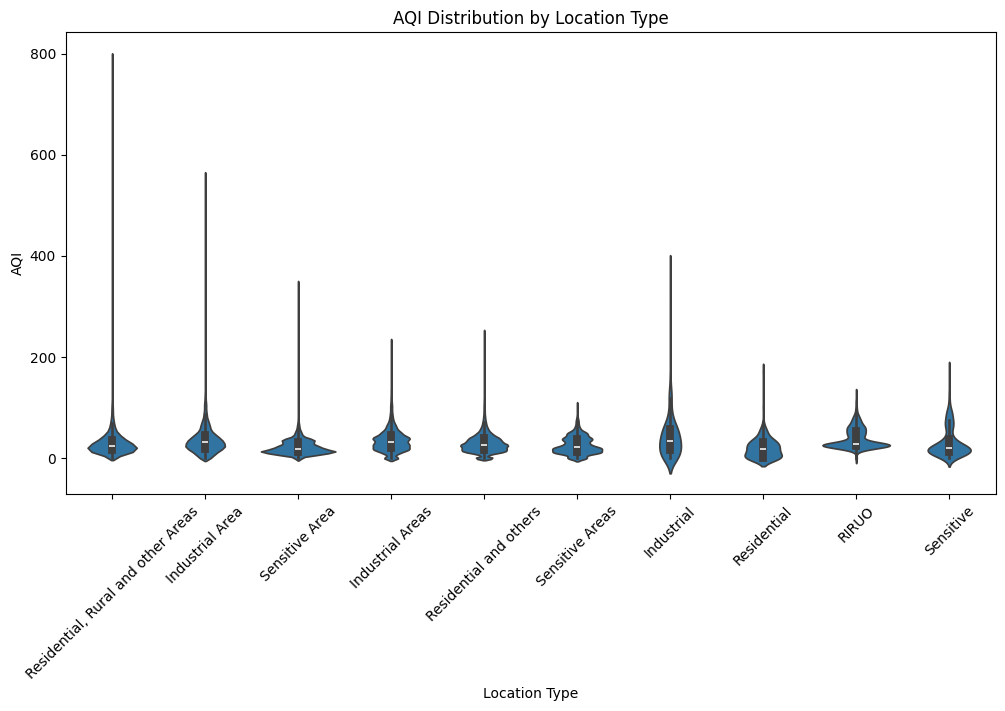

In [164]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='type', y='AQI', data=data)
plt.title('AQI Distribution by Location Type')
plt.xlabel('Location Type')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.show()


In [50]:
df=data[['AQI','date']]
df['date']=pd.to_datetime(df['date'])
df.tail(20)

,AQI,date
435719,91.25,2015-10-23
435720,88.75,2015-10-28
435721,42.50,2015-10-31
435722,50.00,2015-11-05
435723,46.25,2015-11-07
435724,116.25,2015-11-10
435725,112.50,2015-11-11
435726,85.00,2015-11-16
435727,42.50,2015-11-20
435728,86.25,2015-11-26


In [54]:
#Calculating the yearly mean for the data 
df=df.set_index('date').resample('M')["AQI"].mean()
df.head()

date
1987-01-31    33.560993
1987-02-28    39.915748
1987-03-31    43.877193
1987-04-30    33.576087
1987-05-31    38.113750
Freq: M, Name: AQI, dtype: float64

In [55]:
#preprocessing the data values
data=df.reset_index(level=0, inplace=False)
data = data[np.isfinite(data['AQI'])]
data=data[data.date != '1970-01-31']
data = data.reset_index(drop=True)
data.head()

,date,AQI
0,1987-01-31,33.560993
1,1987-02-28,39.915748
2,1987-03-31,43.877193
3,1987-04-30,33.576087
4,1987-05-31,38.113750


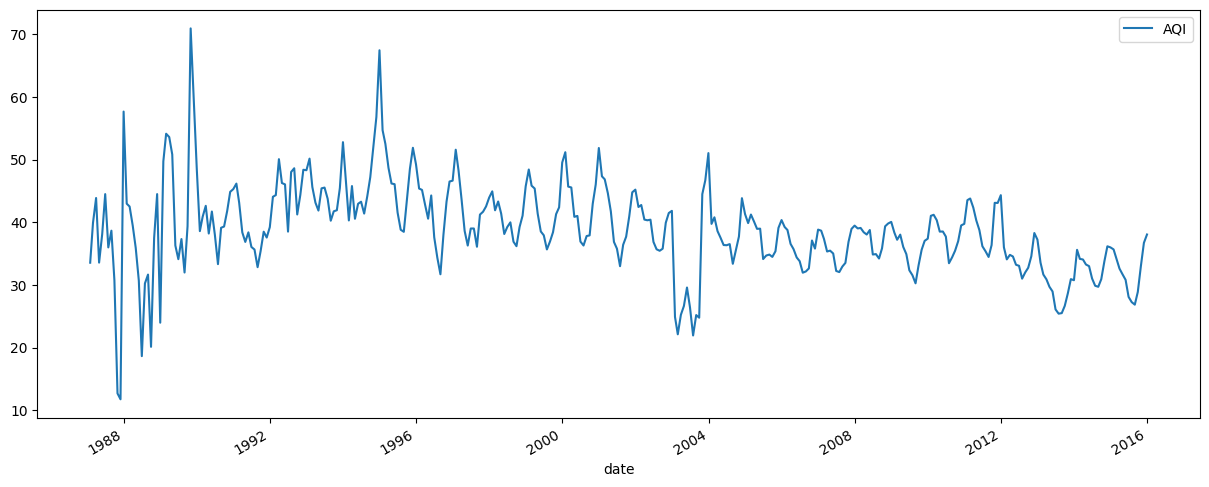

In [56]:
#visualizing the processed data of AQI

df=data.set_index('date')
df.sort_values(by='date',ascending=False)
df.plot(figsize=(15, 6))
plt.show()
y=df.AQI


In [57]:
data

,date,AQI
0,1987-01-31,33.560993
1,1987-02-28,39.915748
2,1987-03-31,43.877193
3,1987-04-30,33.576087
4,1987-05-31,38.113750
...,...,...
341,2015-08-31,26.872813
342,2015-09-30,28.898600
343,2015-10-31,33.047509
344,2015-11-30,36.724860


In [167]:
# # calculating the yearly mean for the data
# df=df.set_index('date').resample('M')['AQI'].mean()
# df.head()

date
1987-01-31    29.873050
1987-02-28    34.907475
1987-03-31    42.166667
1987-04-30    27.217391
1987-05-31    34.863750
Freq: M, Name: AQI, dtype: float64

In [168]:
# # preprocessing the data value
# data=df.reset_index(level=0)
# data=data[np.isfinite(data['AQI'])]
# data=data[data.date!='1970-01-31']
# data=data.reset_index(drop=True)
# data.head()

,date,AQI
0,1987-01-31,29.873050
1,1987-02-28,34.907475
2,1987-03-31,42.166667
3,1987-04-30,27.217391
4,1987-05-31,34.863750


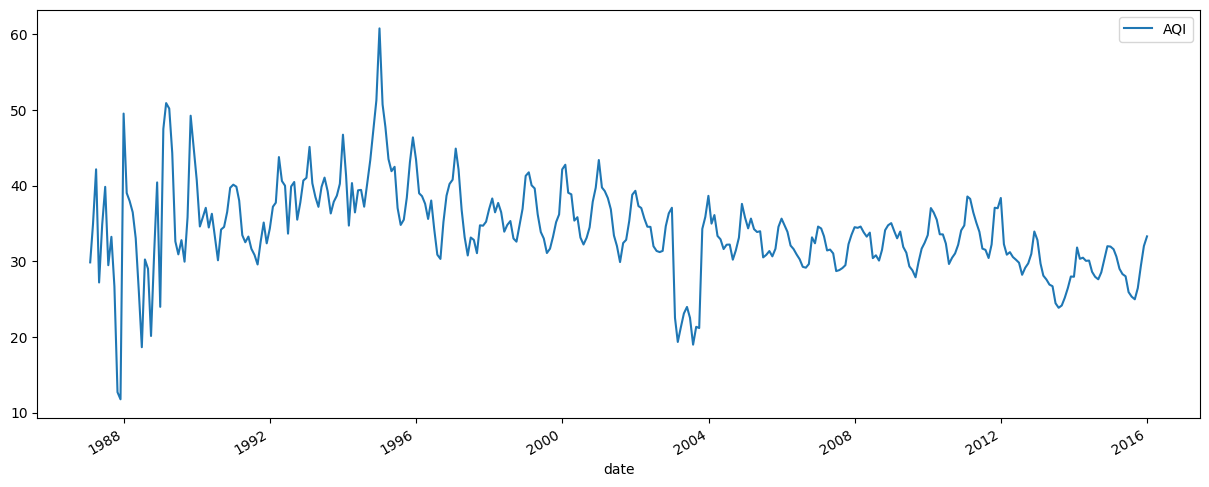

In [169]:
# # visualizing the processed data of AQI
# df=data.set_index('date')
# df.sort_values(by='date',ascending=False)
# df.plot(figsize=(15,6))
# plt.show()
# y=df.AQI

In [100]:
n*train_size

224.9

In [58]:
n=df.shape[0]
train_size=0.65

feature_dataframe=df.sort_values('date')
train=df.iloc[:int(n*train_size)]
test=df.iloc[int(n*train_size):]

In [131]:
# train

<Axes: title={'center': 'Yearly variation'}, xlabel='date'>

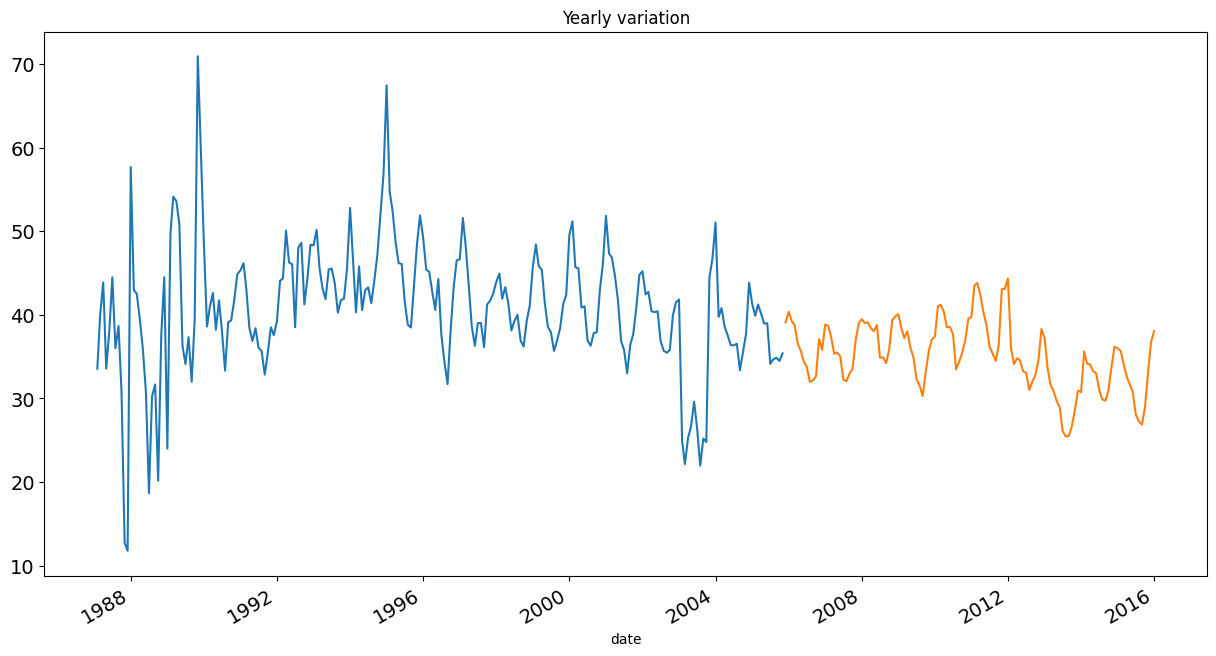

In [59]:
#plotting the yearly variations of AQI
# plt.plot(train['AQI'])
train.AQI.plot(figsize=(15,8),title="Yearly variation",fontsize=14)
test.AQI.plot(figsize=(15,8),title="Yearly variation",fontsize=14)

In [60]:
# resampling the data to predict monthly AQI of india

df=data[['AQI','date']]
df['date']=pd.to_datetime(df['date'])
date=df.groupby(pd.Grouper(key='date',freq='1MS'))['AQI'].mean()
df.count()

AQI     346
date    346
dtype: int64

In [61]:
data

,date,AQI
0,1987-01-31,33.560993
1,1987-02-28,39.915748
2,1987-03-31,43.877193
3,1987-04-30,33.576087
4,1987-05-31,38.113750
...,...,...
341,2015-08-31,26.872813
342,2015-09-30,28.898600
343,2015-10-31,33.047509
344,2015-11-30,36.724860


In [62]:
# splitting the sampling date into month and year accordingly
data['month']=data['date'].dt.month
data['year']=data['date'].dt.year
data=data[['AQI','date','month','year']]
data.head()

,AQI,date,month,year
0,33.560993,1987-01-31,1,1987
1,39.915748,1987-02-28,2,1987
2,43.877193,1987-03-31,3,1987
3,33.576087,1987-04-30,4,1987
4,38.113750,1987-05-31,5,1987


In [63]:
# prediction january across india 
data=data[data['month']==1]
data.head()

,AQI,date,month,year
0,33.560993,1987-01-31,1,1987
12,42.974437,1988-01-31,1,1988
24,49.718403,1989-01-31,1,1989
35,38.596746,1990-01-31,1,1990
47,46.171875,1991-01-31,1,1991


In [71]:
# Appling Boxplot analysis
df = data[['AQI','year']].groupby(["year"]).mean().reset_index().sort_values(by='year',ascending=False)
df=df.dropna()
dd=df
df.describe()


,year,AQI
count,29.000000,29.000000
mean,2001.000000,42.161225
std,8.514693,6.566777
min,1987.000000,24.927551
25%,1994.000000,38.596746
50%,2001.000000,42.444737
75%,2008.000000,46.171875
max,2015.000000,54.686111


<Axes: xlabel='AQI'>

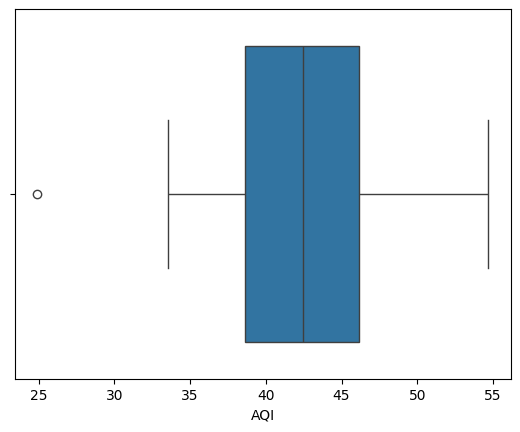

In [72]:
sns.boxplot(x=df['AQI'])


In [59]:
#removing Outliers
df = df[np.isfinite(df['AQI'])]
df=df[df.AQI >153]
df=df[df.AQI <221]

In [60]:
#scatter plot of data points
cols =['year']
y = df['AQI']
x=df[cols]

plt.scatter(x,y)
plt.show()

KeyError: "None of [Index(['year'], dtype='object')] are in the [columns]"

In [118]:
x.mean()

year    2001.857143
dtype: float64

In [119]:
x=(x-x.mean())/x.std()
x=np.c_[np.ones(x.shape[0]),x]
x

array([[ 1.        ,  1.18359389],
       [ 1.        ,  1.05413831],
       [ 1.        ,  0.92468273],
       [ 1.        ,  0.79522715],
       [ 1.        ,  0.66577156],
       [ 1.        ,  0.53631598],
       [ 1.        ,  0.4068604 ],
       [ 1.        ,  0.27740482],
       [ 1.        ,  0.01849365],
       [ 1.        , -0.49932867],
       [ 1.        , -0.75823984],
       [ 1.        , -1.27606216],
       [ 1.        , -1.53497333],
       [ 1.        , -1.79388449]])

In [120]:
y

24    43.536638
23    41.033777
22    38.373599
21    39.024492
20    38.668347
19    39.251014
18    39.877253
17    39.750702
15    42.444737
11    44.935505
9     45.385985
5     44.068972
3     38.596746
1     42.974437
Name: AQI, dtype: float64

In [121]:
np.random.seed(4)

In [51]:
# Applying GRADIENT DESCENT 

alpha = 0.1 #Step size
iterations = 3000 #No. of iterations
m = y.size #No. of data points
np.random.seed(4) #Setting the seed
theta = np.random.rand(2) #Picking random values to start with

def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
#       The cost function used here is the Mean Squared Error (MSE), 
#       which measures the difference between the predicted values and
#       the actual values.
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs
past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Printing the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 200.17, -1.54


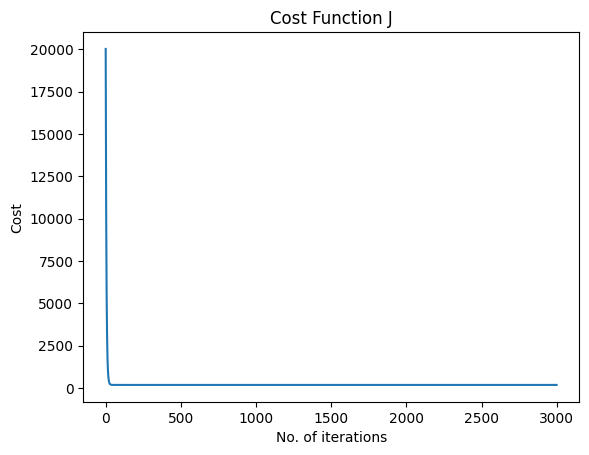

In [52]:
#Plotting the cost function...
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

In [53]:
x

array([[ 1.        ,  1.40346276],
       [ 1.        ,  1.09883519],
       [ 1.        ,  0.9465214 ],
       [ 1.        ,  0.79420761],
       [ 1.        ,  0.64189382],
       [ 1.        ,  0.48958003],
       [ 1.        ,  0.33726625],
       [ 1.        ,  0.03263867],
       [ 1.        , -0.11967512],
       [ 1.        , -0.57661648],
       [ 1.        , -0.72893027],
       [ 1.        , -1.03355785],
       [ 1.        , -1.33818543],
       [ 1.        , -1.94744058]])

In [54]:
#Predicted val
newB=[ 200.17, -1.54]
def rmse(y,y_pred):
    rmse=np.sqrt(sum(y-y_pred))
    return rmse

   
y_pred=x.dot(newB)

dt = pd.DataFrame({'Actual': y, 'Predicted': y_pred})  
x=pd.concat([df, dt], axis=1)
x
x

,year,AQI,Actual,Predicted
23,2010,188.283360,188.283360,198.008667
21,2008,214.378174,214.378174,198.477794
20,2007,211.160807,211.160807,198.712357
19,2006,219.623267,219.623267,198.946920
18,2005,207.546049,207.546049,199.181484
17,2004,164.661496,164.661496,199.416047
16,2003,163.875510,163.875510,199.650610
14,2001,205.138247,205.138247,200.119736
13,2000,195.772377,195.772377,200.354300
10,1997,220.903571,220.903571,201.057989


In [55]:
#calculating the root mean squared error for the predicted AQi values

from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y,y_pred)))

18.630885273104596


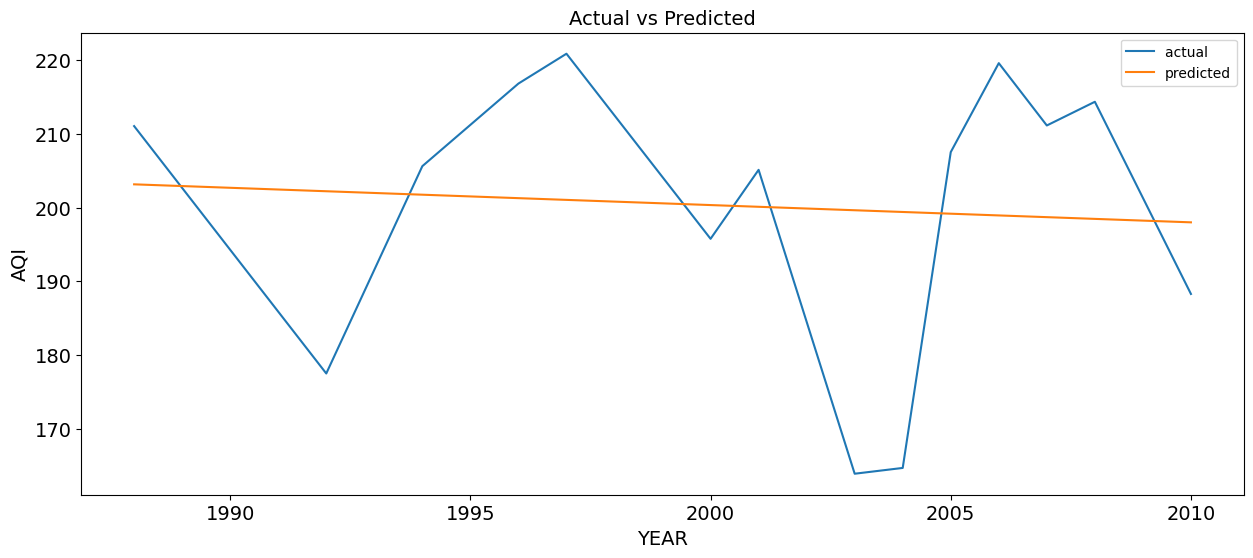

In [56]:
plt.figure(figsize=(15,6))

x_axis=x.year
y_axis=x.Actual
y1_axis=x.Predicted
plt.plot(x_axis,y_axis)
plt.plot(x_axis,y1_axis)
plt.title("Actual vs Predicted",fontsize=14)
plt.legend(["actual ","predicted"])
plt.xlabel("YEAR",fontsize=14)
plt.ylabel("AQI",fontsize=14)
plt.tick_params(labelsize=14)
plt.show()

In [57]:
#improving the accuracy by splitting the data on heavy variations

df=dd[['year','AQI']]


#huge variations aqi accures on year 2009-2010 (by moving average graph)
df=df[df.year<2011]
df.describe()

,year,AQI
count,24.000000,24.000000
mean,1998.500000,203.441075
std,7.071068,38.624462
min,1987.000000,65.754613
25%,1992.750000,193.900123
50%,1998.500000,212.769491
75%,2004.250000,225.854972
max,2010.000000,242.438652


<Axes: xlabel='AQI'>

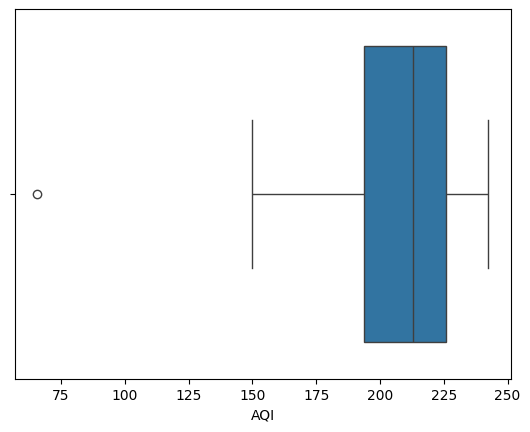

In [58]:
#applying boxplot analysis
import seaborn as sns
sns.boxplot(x=df['AQI'])

In [59]:
#removing Outliers
df = df[np.isfinite(df['AQI'])]
df=df[df.AQI >200]
df=df[df.AQI <226]
df

,year,AQI
22,2009,221.368166
21,2008,214.378174
20,2007,211.160807
19,2006,219.623267
18,2005,207.546049
14,2001,205.138247
12,1999,225.439218
10,1997,220.903571
9,1996,216.850189
7,1994,205.636343


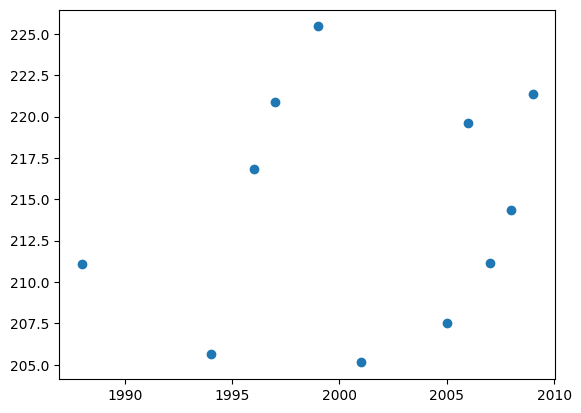

In [60]:
#plotting data points
cols =['year']
y = df['AQI']
x=df[cols]

plt.scatter(x,y)
plt.show()

In [61]:
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]
x

array([[ 1.        ,  1.20224174],
       [ 1.        ,  1.05365007],
       [ 1.        ,  0.90505839],
       [ 1.        ,  0.75646671],
       [ 1.        ,  0.60787504],
       [ 1.        ,  0.01350833],
       [ 1.        , -0.28367502],
       [ 1.        , -0.58085837],
       [ 1.        , -0.72945005],
       [ 1.        , -1.0266334 ],
       [ 1.        , -1.91818345]])

In [62]:
#Tunning model with GRADIENT DESCENT

alpha = 0.1 #Step size
iterations = 3000 #No. of iterations
m = y.size #No. of data points
np.random.seed(4) #Setting the seed
theta = np.random.rand(2) #Picking some random values to start with

def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 214.47, 1.18


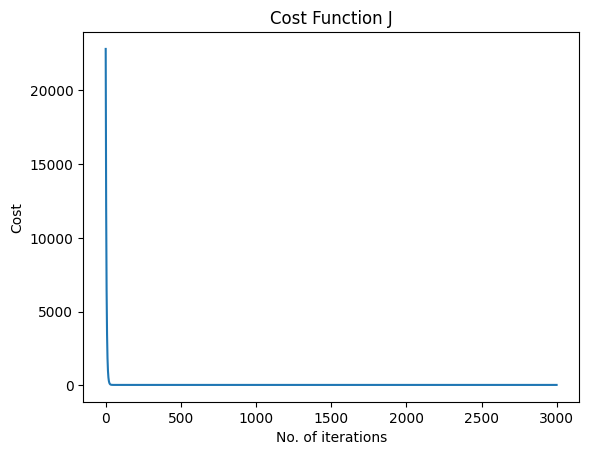

In [63]:
#Plotting the cost function...
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

In [64]:
#predicting january(1988-2009) AQI across india

import numpy as np
newB=[ 214.47, 1.18]

def rmse(y,y_pred):
    rmse= (np.sqrt(np.mean((y-y_pred)**2)))
    return rmse
   
y_pred=x.dot(newB)
dt = pd.DataFrame({'Actual': y, 'Predicted': y_pred})  
x=pd.concat([df, dt], axis=1)
x

,year,AQI,Actual,Predicted
22,2009,221.368166,221.368166,215.888645
21,2008,214.378174,214.378174,215.713307
20,2007,211.160807,211.160807,215.537969
19,2006,219.623267,219.623267,215.362631
18,2005,207.546049,207.546049,215.187293
14,2001,205.138247,205.138247,214.485940
12,1999,225.439218,225.439218,214.135263
10,1997,220.903571,220.903571,213.784587
9,1996,216.850189,216.850189,213.609249
7,1994,205.636343,205.636343,213.258573


In [65]:
#testing the accuracy of the model

from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y,y_pred)))

6.489338584209796


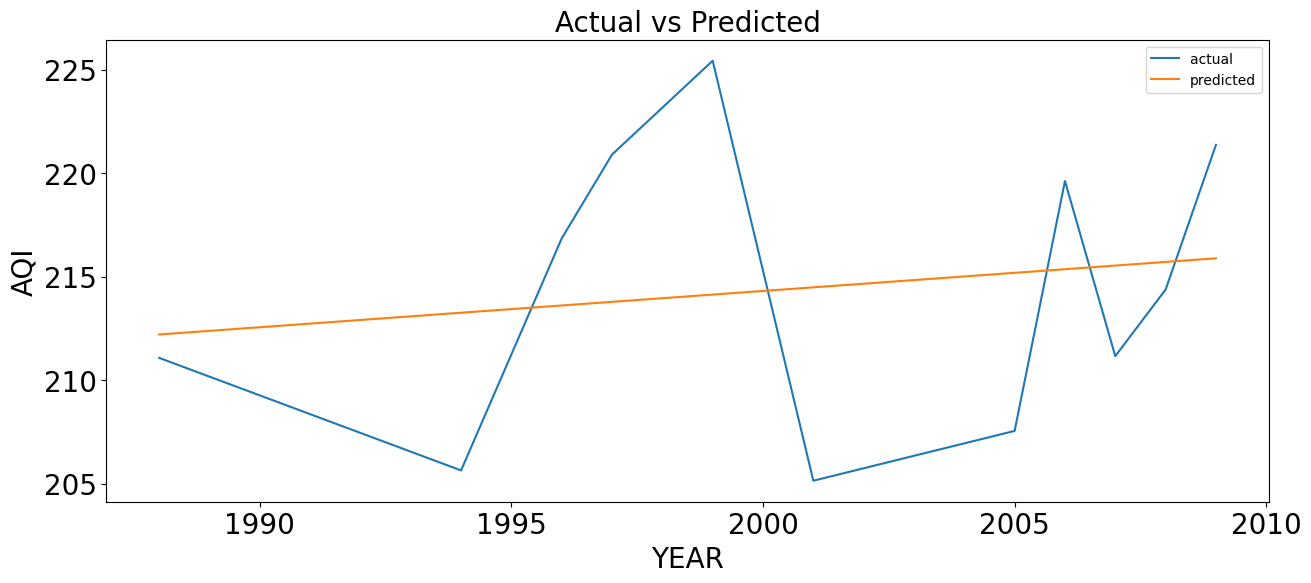

In [66]:
plt.figure(figsize=(15,6))
x_axis=x.year
y_axis=x.Actual
y1_axis=x.Predicted
plt.plot(x_axis,y_axis)
plt.plot(x_axis,y1_axis)
plt.title("Actual vs Predicted",fontsize=20)
plt.legend(["actual ","predicted"])
plt.xlabel("YEAR",fontsize=20)
plt.ylabel("AQI",fontsize=20)
plt.tick_params(labelsize=20)
plt.show()

In [67]:
#improving the accuracy by splitting the data on heavy variations

df= dd[['year','AQI']]

#huge variations aqi accures on year 2009-2010 (by moving average graph)
df=df[df.year>2010]
df.describe()

,year,AQI
count,5.000000,5.000000
mean,2013.000000,105.658889
std,1.581139,7.285694
min,2011.000000,99.696254
25%,2012.000000,101.258882
50%,2013.000000,102.785280
75%,2014.000000,106.729246
max,2015.000000,117.824783


<Axes: xlabel='AQI'>

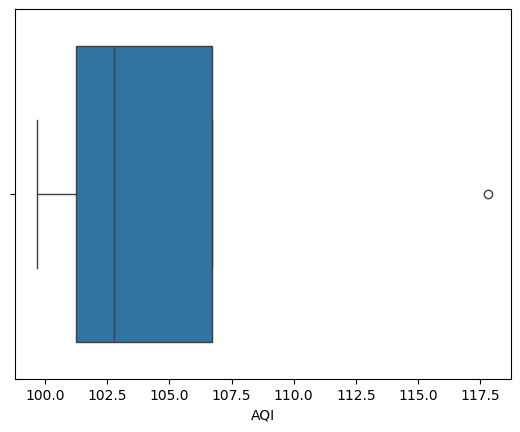

In [68]:
#applying boxplot
import seaborn as sns
sns.boxplot(x=df['AQI'])


In [69]:
df = df[np.isfinite(df['AQI'])]
df=df[df.AQI >101]
df=df[df.AQI <106]
df.head()

,year,AQI
28,2015,101.258882
27,2014,102.785280


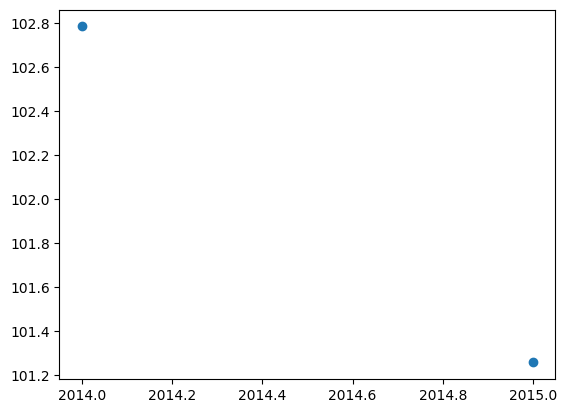

In [70]:
y = df['AQI']
x=df[cols]

plt.scatter(x,y)
plt.show()

In [71]:
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]
x

array([[ 1.        ,  0.70710678],
       [ 1.        , -0.70710678]])

In [72]:
#Tunning model with GRADIENT DESCENT

alpha = 0.1 #Step size
iterations = 3000 #No. of iterations
m = y.size #No. of data points
np.random.seed(4) #Setting the seed
theta = np.random.rand(2) #Picking some random values to start with

def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 102.02, -1.08


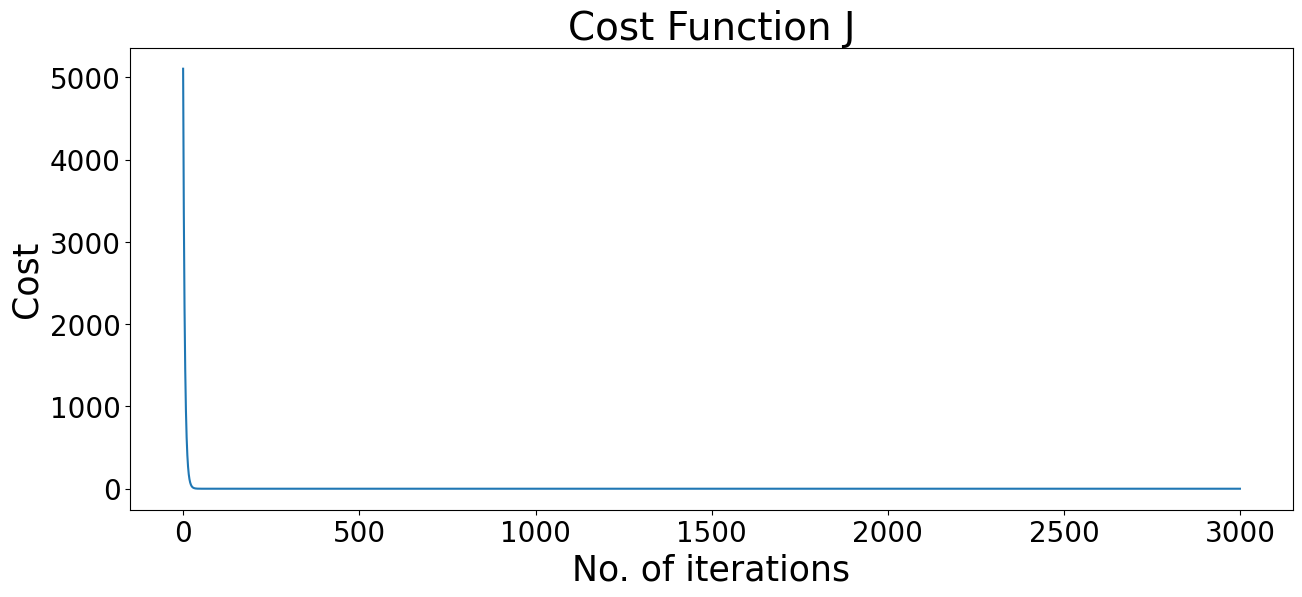

In [73]:
#Plotting the cost function...
plt.figure(figsize=(15,6))
plt.title('Cost Function J',fontsize=28)
plt.xlabel('No. of iterations',fontsize=25)
plt.ylabel('Cost',fontsize=25)
plt.plot(past_costs)
plt.tick_params(labelsize=20)
plt.show()

In [74]:
#prediction of january(2013-2015) across india
import numpy as np
newB=[ 102, -1.12]

def rmse(y,y_pred):
    rmse= np.sqrt(sum(y-y_pred))
    return rmse
   
y_pred=x.dot(newB)

dt = pd.DataFrame({'Actual': y, 'Predicted': y_pred})  
x=pd.concat([df, dt], axis=1)
x

,year,AQI,Actual,Predicted
28,2015,101.258882,101.258882,101.20804
27,2014,102.785280,102.785280,102.79196


In [75]:
#testing the accuracy of the model

from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y,y_pred)))

0.036259627450399734


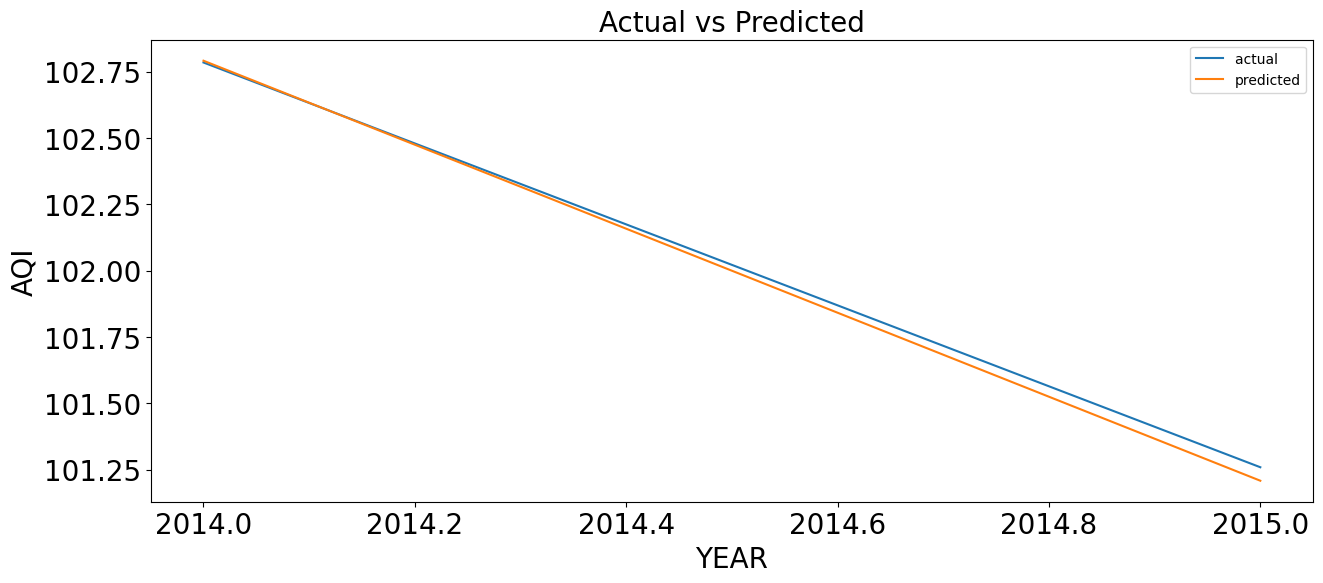

In [76]:
#plotting the actual and predicted results
plt.figure(figsize=(15,6))

x_axis=x.year
y_axis=x.Actual
y1_axis=x.Predicted
plt.plot(x_axis,y_axis)
plt.plot(x_axis,y1_axis)
plt.title("Actual vs Predicted",fontsize=20)
plt.legend(["actual ","predicted"])
plt.xlabel("YEAR",fontsize=20)
plt.ylabel("AQI",fontsize=20)
plt.tick_params(labelsize=20)
plt.show()

In [77]:
#Prediction for the future 
from sklearn.preprocessing import MinMaxScaler

In [78]:
#feeding in the x value-years
data=[[-1,2016],[-1,2017],[-1,2018],[-1,2019],[-1,2020]]

In [79]:
#normalization
scaler=MinMaxScaler(feature_range=(-1,1))
scaler.fit(data)
x=scaler.transform(data)

In [80]:
#calculations
newB=[103.59,-2.74]
ypred=-(x.dot(newB))

In [81]:
# AQI for the year 2020
print("AQI for the year 2020===>",ypred[-1])

AQI for the year 2020===> 106.33
